# MP 1: Safety Analysis of Autonomous Vehicles
## Part 1: Simulation with Carla
Group 9: 
- Zach Larson (zlarson2)
- Máximo Rojas (mgr9)
- Matthew Paul (mjpaul3)

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from dtaidistance import dtw
import networkx as nx

### Task 1

**1. Import all the .csv data (including 4 weather conditions:"clear-night", "clearsunset", "clear-noon", "rain-noon") of the ghost_cutin scene into Jupyter Notebook.
List the first 5 rows of the ctl.csv, cvip.csv, and traj.csv with the clear-night weather
condition. (1 point)**

In [2]:
# Importing csv data

# Clear Night
clear_night_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_ctl.csv")
clear_night_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_cvip.csv")
clear_night_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_traj.csv")

# Clear Sunset
clear_sunset_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_ctl.csv")
clear_sunset_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_cvip.csv")
clear_sunset_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_traj.csv")

# Clear Noon
clear_noon_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_ctl.csv")
clear_noon_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_cvip.csv")
clear_noon_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_traj.csv")

# Rain Noon
rain_noon_ctl = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_ctl.csv")
rain_noon_cvip = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_cvip.csv")
rain_noon_traj = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_traj.csv")

# Haze Noon
haze_noon_ctl = pd.read_csv("campaign_results/route_highway_epoch24_haze-noon_fi_ghost_cutin/routes_fi_route_highway-0912_170123-data_fi_ghost_cutin-single_ctl.csv")
haze_noon_cvip = pd.read_csv("campaign_results/route_highway_epoch24_haze-noon_fi_ghost_cutin/routes_fi_route_highway-0912_170123-data_fi_ghost_cutin-single_cvip.csv")
haze_noon_traj = pd.read_csv("campaign_results/route_highway_epoch24_haze-noon_fi_ghost_cutin/routes_fi_route_highway-0912_170123-data_fi_ghost_cutin-single_traj.csv")

# Haze Sunset
haze_sunset_ctl = pd.read_csv("campaign_results/route_highway_epoch24_haze-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170237-data_fi_ghost_cutin-single_ctl.csv")
haze_sunset_cvip = pd.read_csv("campaign_results/route_highway_epoch24_haze-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170237-data_fi_ghost_cutin-single_cvip.csv")
haze_sunset_traj = pd.read_csv("campaign_results/route_highway_epoch24_haze-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170237-data_fi_ghost_cutin-single_traj.csv")

In [3]:
# First 5 rows of clear-night condition

print(clear_night_ctl.head(5),'\n')
print(clear_night_cvip.head(5),'\n')
print(clear_night_traj.head(5))

      ts  agent_id  throttle     steer  brake
0  34097         0       0.9 -0.013192    0.0
1  34098         0       0.9 -0.003670    0.0
2  34099         0       0.9 -0.004190    0.0
3  34100         0       0.9 -0.003286    0.0
4  34101         0       0.9  0.000093    0.0 

      ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  34097         0  500.491189  198.767441 -95.832657 -499.819366
1  34098         0    5.595580  195.567444 -90.832657    0.100000
2  34099         0    5.592365  195.567444 -90.832657    0.095407
3  34100         0    5.589578  195.567444 -90.832657    0.084691
4  34101         0    5.587154  195.567444 -90.832657    0.069311 

      ts  agent_id           x         y         z    v
0  34097         0  192.362411 -86.26268  0.539326  0.0
1  34098         0  192.362411 -86.26268  0.491906  0.0
2  34099         0  192.362411 -86.26268  0.438374  0.0
3  34100         0  192.362411 -86.26268  0.378732  0.0
4  34101         0  192.362411 -86.26268  0.

**2. Summarize the following information for each weather condition ("clear-night",
"clear-sunset", "clear-noon", "rain-noon"): (2 points)**

>**a. The duration of the scene.**

>**b. Mean and standard deviation of the values of the features (“throttle”, “steer”, “brake”, “cvip”, “x”, “y”, “v”). Round your results to 3 decimal place and save them in a table, with the weather conditions as columns, and the features as rows (hint: you can store the table in a data frame).**

In [4]:
# Clear Night Summarization, Duration

clear_night_dfs = [clear_night_ctl,clear_night_cvip,clear_night_traj]
clear_night = clear_night_dfs[0]
for df in clear_night_dfs[1:]:
    clear_night = pd.merge(clear_night, df, on=['ts', 'agent_id'])
clear_night = clear_night.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
clear_night = clear_night[1:].reset_index().drop(['index'],axis=1)

clear_night_duration = clear_night['ts'][clear_night.shape[0]-1] - clear_night['ts'][0]
# print(clear_night['ts'][0],clear_night['ts'][clear_night.shape[0]-1])
# print(clear_night_duration," milliseonds")

In [5]:
## Clear Sunset Compilation, Duration
clear_sunset_dfs = [clear_sunset_ctl,clear_sunset_cvip,clear_sunset_traj]
clear_sunset = clear_sunset_dfs[0]
for df in clear_sunset_dfs[1:]:
    clear_sunset = pd.merge(clear_sunset, df, on=['ts', 'agent_id'])
clear_sunset = clear_sunset.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
clear_sunset = clear_sunset[1:].reset_index().drop(['index'],axis=1)

clear_sunset_duration = clear_sunset['ts'][clear_sunset.shape[0]-1] - clear_sunset['ts'][0]
# print(clear_sunset['ts'][0],clear_sunset['ts'][clear_sunset.shape[0]-1])
# print(clear_sunset_duration," milliseonds")

In [6]:
## Clear Noon Compilation, Duration
clear_noon_dfs = [clear_noon_ctl,clear_noon_cvip,clear_noon_traj]
clear_noon = clear_noon_dfs[0]
for df in clear_noon_dfs[1:]:
    clear_noon = pd.merge(clear_noon, df, on=['ts', 'agent_id'])
clear_noon = clear_noon.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
clear_noon = clear_noon[1:].reset_index().drop(['index'],axis=1)

clear_noon_duration = clear_noon['ts'][clear_noon.shape[0]-1] - clear_noon['ts'][0]
# print(clear_noon['ts'][0],clear_noon['ts'][clear_noon.shape[0]-1])
# print(clear_noon_duration," milliseonds")

In [7]:
## Rainy Noon Compilation, Duration
rain_noon_dfs = [rain_noon_ctl,rain_noon_cvip,rain_noon_traj]
rain_noon = rain_noon_dfs[0]
for df in rain_noon_dfs[1:]:
    rain_noon = pd.merge(rain_noon, df, on=['ts', 'agent_id'])
rain_noon = rain_noon.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
rain_noon = rain_noon[1:].reset_index().drop(['index'],axis=1)

rain_noon_duration = rain_noon['ts'][rain_noon.shape[0]-1] - rain_noon['ts'][0]
# print(rain_noon['ts'][0],rain_noon['ts'][rain_noon.shape[0]-1])
# print(rain_noon_duration," milliseonds")

In [8]:
## Hazy Noon Compilation, Duration
haze_noon_dfs = [haze_noon_ctl,haze_noon_cvip,haze_noon_traj]
haze_noon = haze_noon_dfs[0]
for df in haze_noon_dfs[1:]:
    haze_noon = pd.merge(haze_noon, df, on=['ts', 'agent_id'])
haze_noon = haze_noon.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
haze_noon = haze_noon[1:].reset_index().drop(['index'],axis=1)

haze_noon_duration = haze_noon['ts'][haze_noon.shape[0]-1] - haze_noon['ts'][0]
# print(haze_noon['ts'][0],haze_noon['ts'][haze_noon.shape[0]-1])
# print(haze_noon_duration," milliseonds")

In [9]:
## Hazy Sunset Compilation, Duration
haze_sunset_dfs = [haze_sunset_ctl,haze_sunset_cvip,haze_sunset_traj]
haze_sunset = haze_sunset_dfs[0]
for df in haze_sunset_dfs[1:]:
    haze_sunset = pd.merge(haze_sunset, df, on=['ts', 'agent_id'])
haze_sunset = haze_sunset.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
haze_sunset = haze_sunset[1:].reset_index().drop(['index'],axis=1)

haze_sunset_duration = haze_sunset['ts'][haze_sunset.shape[0]-1] - haze_sunset['ts'][0]
# print(haze_sunset['ts'][0],haze_sunset['ts'][haze_sunset.shape[0]-1])
# print(haze_sunset_duration," milliseonds")

In [10]:
## Mean and STD Calculations -- Combined
means_dict = {
    "Clear Night":clear_night.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Clear Sunset":clear_sunset.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Clear Noon":clear_noon.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Rain Noon":rain_noon.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Haze Noon":haze_noon.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Haze Sunset":haze_sunset.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
}
means = pd.DataFrame(means_dict)

std_dict = {
    "Clear Night":clear_night.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Clear Sunset":clear_sunset.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Clear Noon":clear_noon.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Rain Noon":rain_noon.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Haze Noon":haze_noon.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Haze Sunset":haze_sunset.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
}
stds = pd.DataFrame(std_dict)

# Durations -- Combined
duration_dict = {
    "Clear Night":clear_night_duration,
    "Clear Sunset":clear_sunset_duration,
    "Clear Noon":clear_noon_duration,
    "Rain Noon":rain_noon_duration,
    "Haze Noon":haze_noon_duration,
    "Haze Sunset":haze_sunset_duration,
}
durations = pd.DataFrame(list(duration_dict.values()), index=list(duration_dict.keys()),columns=["Duration (ms)"]).T

In [11]:
# Means Table
means

Clear Night  Clear Sunset  Clear Noon  Rain Noon  Haze Noon  \
throttle        0.633         0.610       0.609      0.644      0.601   
steer           0.004         0.000       0.001     -0.000      0.001   
brake           0.116         0.057       0.061      0.047      0.055   
cvip           32.185        19.488      18.826      5.828     19.118   
x             191.313       192.947     192.921    192.631    192.941   
y             -32.170       -31.068     -31.347    -63.818    -31.725   
v               6.223         6.893       6.938      6.358      6.927   

          Haze Sunset  
throttle        0.601  
steer           0.001  
brake           0.059  
cvip           19.730  
x             192.944  
y             -31.407  
v               6.877

In [12]:
# STD Table
stds

Clear Night  Clear Sunset  Clear Noon  Rain Noon  Haze Noon  \
throttle        0.345         0.281       0.282      0.273      0.298   
steer           0.048         0.005       0.005      0.003      0.005   
brake           0.320         0.232       0.240      0.213      0.227   
cvip           27.841        17.432      16.721      1.260     16.415   
x               1.171         0.400       0.404      0.253      0.411   
y              39.071        40.427      40.487     21.141     40.711   
v               2.877         3.307       3.277      3.856      3.043   

          Haze Sunset  
throttle        0.304  
steer           0.005  
brake           0.236  
cvip           17.262  
x               0.410  
y              40.589  
v               3.055

In [13]:
# Durations
durations

Clear Night  Clear Sunset  Clear Noon  Rain Noon  Haze Noon  \
Duration (ms)          838           756         750        400        751   

               Haze Sunset  
Duration (ms)          757

**3. Visualize the campaign results of the ghost_cutin scene for each weather condition. Plot the throttle values (y-axis) of the agent vs time (x-aixs). Please plot all the weather conditions in one figure, and repeat the same step for all other features as well (“steer”, “brake”, “cvip”, “x”, “y”, “v”). (2 points)**

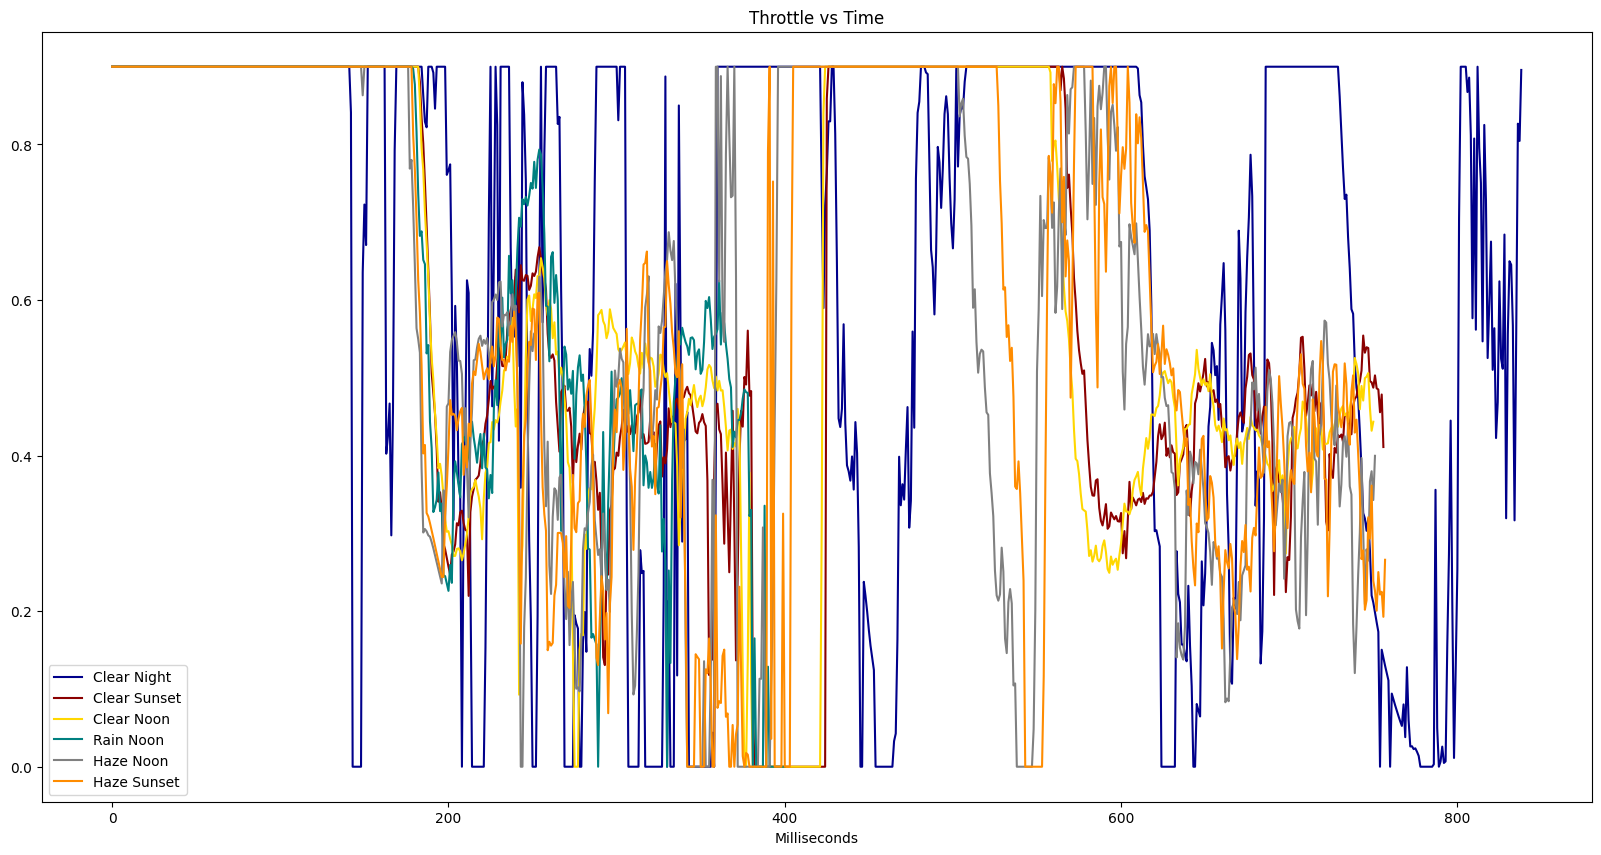

In [14]:
# generating time scale
time = np.arange(0,1000,1)

## Throttle vs Time
plt.figure(figsize=(20,10))

plt.title("Throttle vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['throttle'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['throttle'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['throttle'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['throttle'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['throttle'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['throttle'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/throttle_time.png")
plt.show()

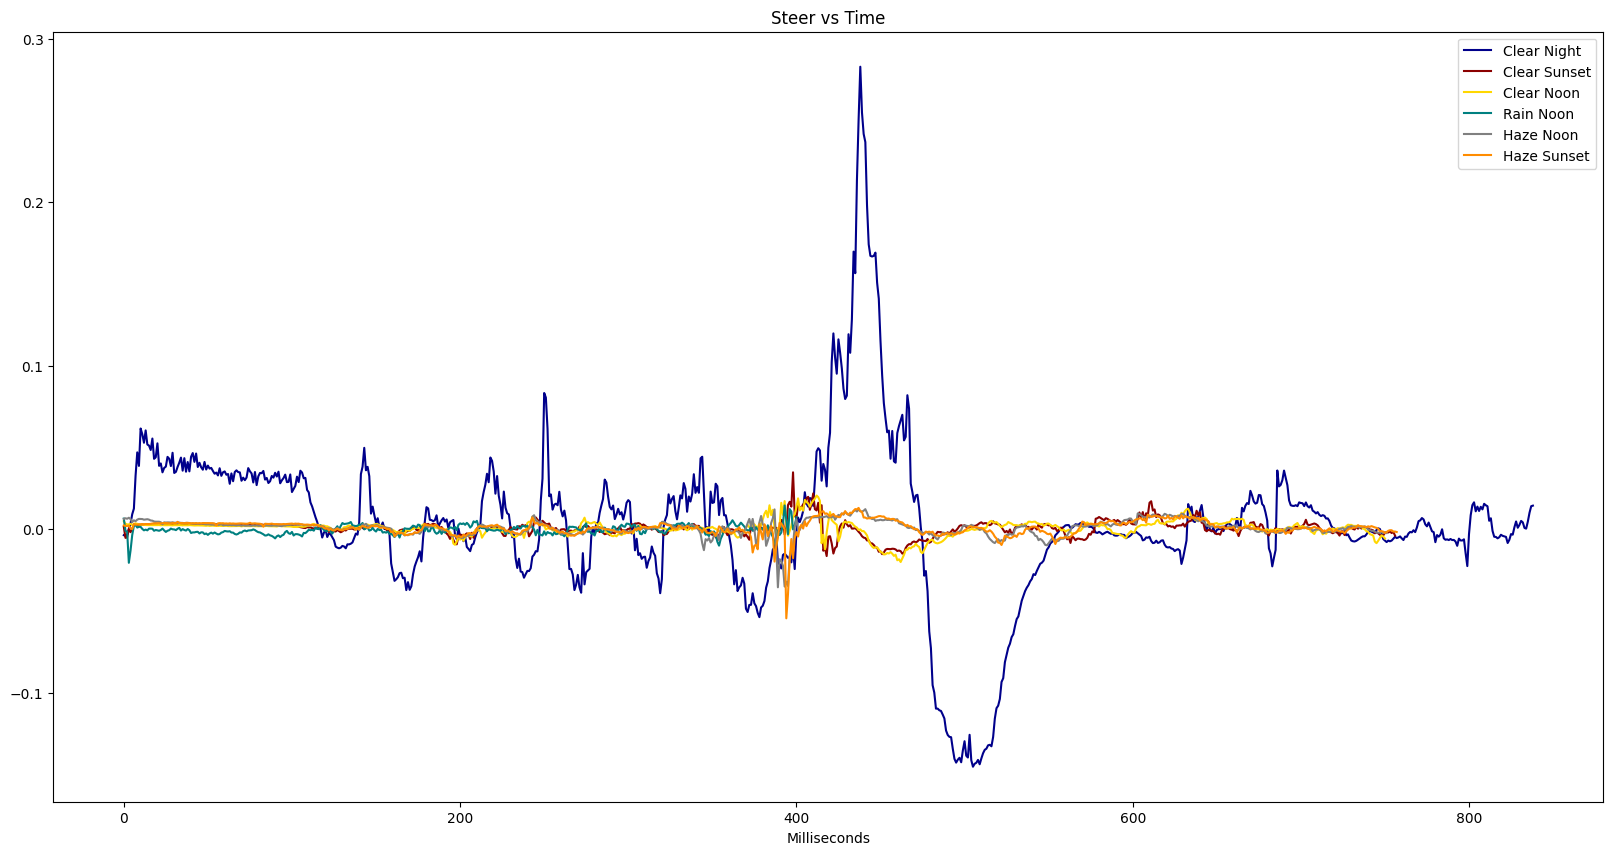

In [15]:
## Steer vs Time
plt.figure(figsize=(20,10))

plt.title("Steer vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['steer'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['steer'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['steer'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['steer'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['steer'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['steer'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/steer_time.png")
plt.show()

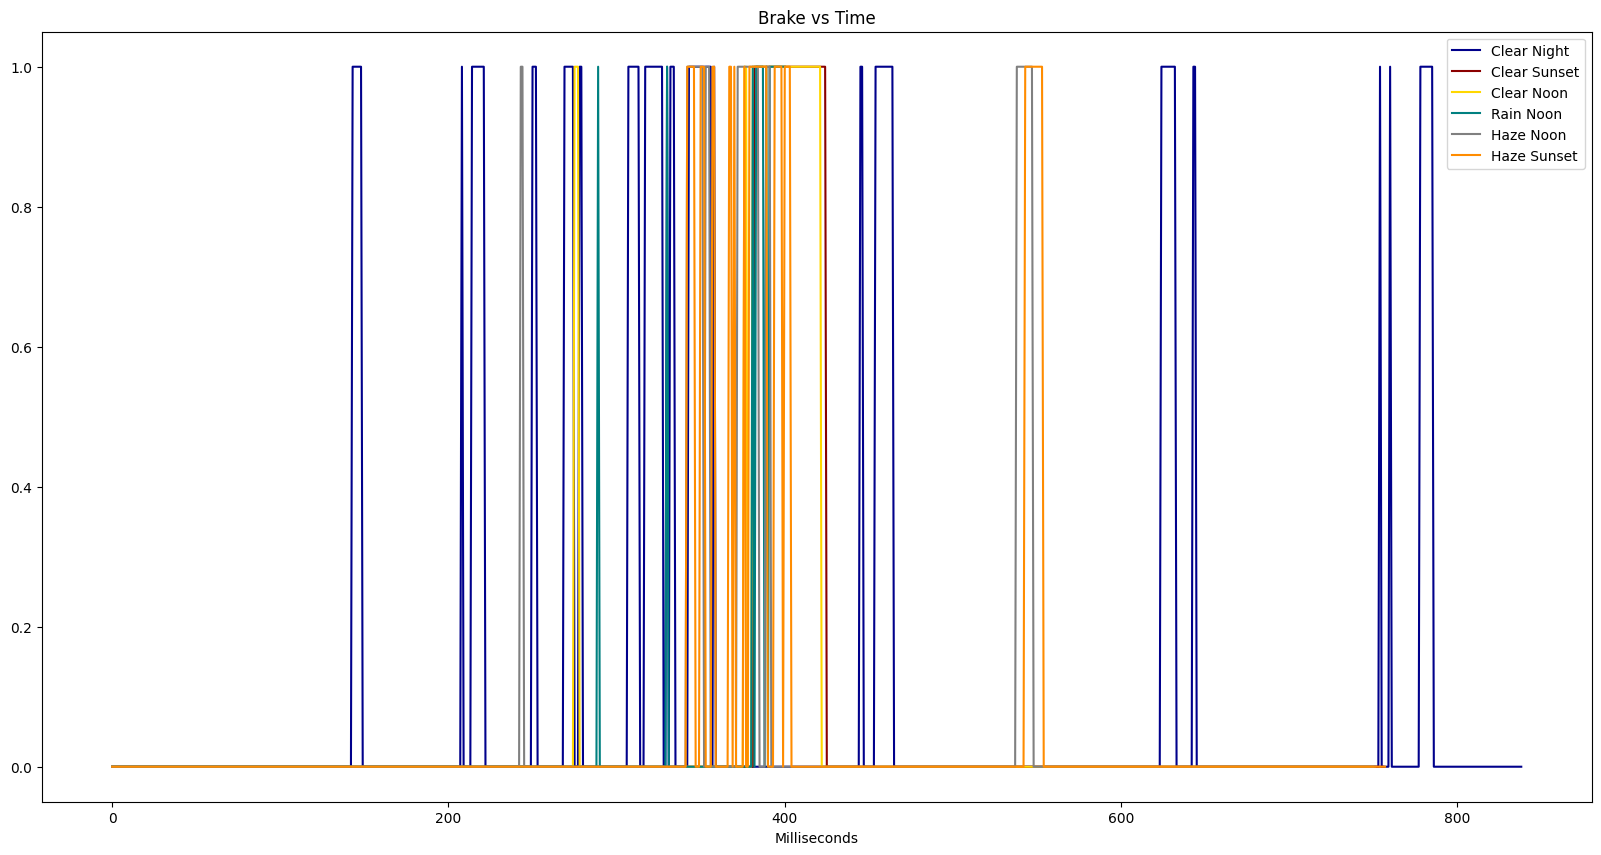

In [16]:
## Brake vs Time
plt.figure(figsize=(20,10))

plt.title("Brake vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['brake'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['brake'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['brake'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['brake'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['brake'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['brake'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/brake_time.png")
plt.show()

In [17]:
## Cvip vs Time
plt.figure(figsize=(20,10))

plt.title("Cvip vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['cvip'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['cvip'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['cvip'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['cvip'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['cvip'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['cvip'],color='darkorange',label="Haze Sunset")

plt.ylim(0,100)
plt.xlim(1,500)

plt.legend()
# plt.savefig("Figures/cvip_time.png")
plt.show()

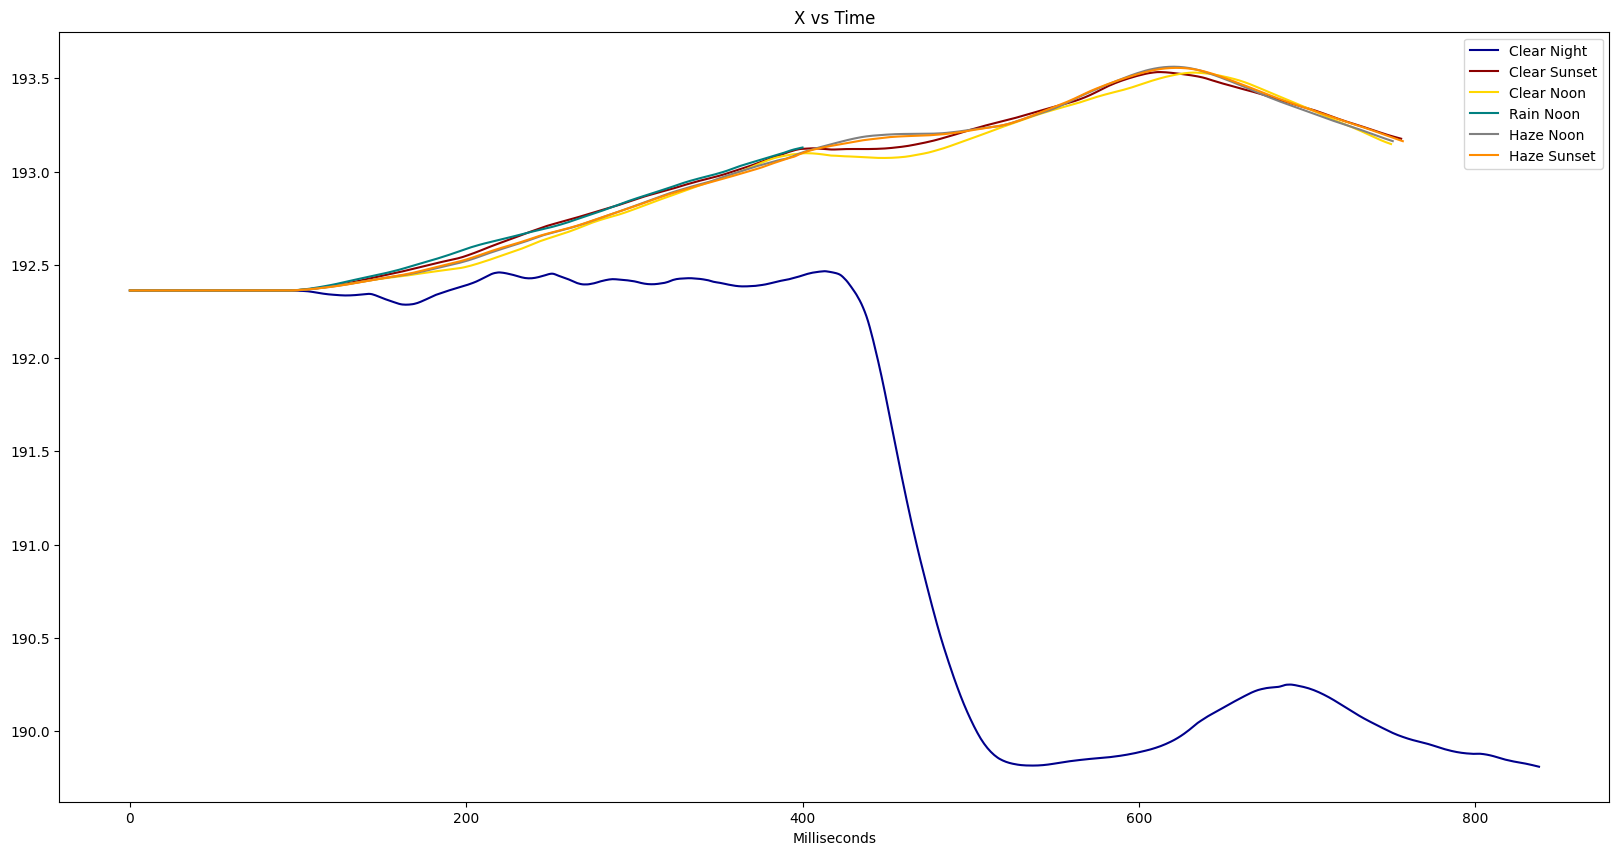

In [18]:
## X vs Time
plt.figure(figsize=(20,10))

plt.title("X vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['x'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['x'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['x'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['x'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['x'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['x'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/x_time.png")
plt.show()

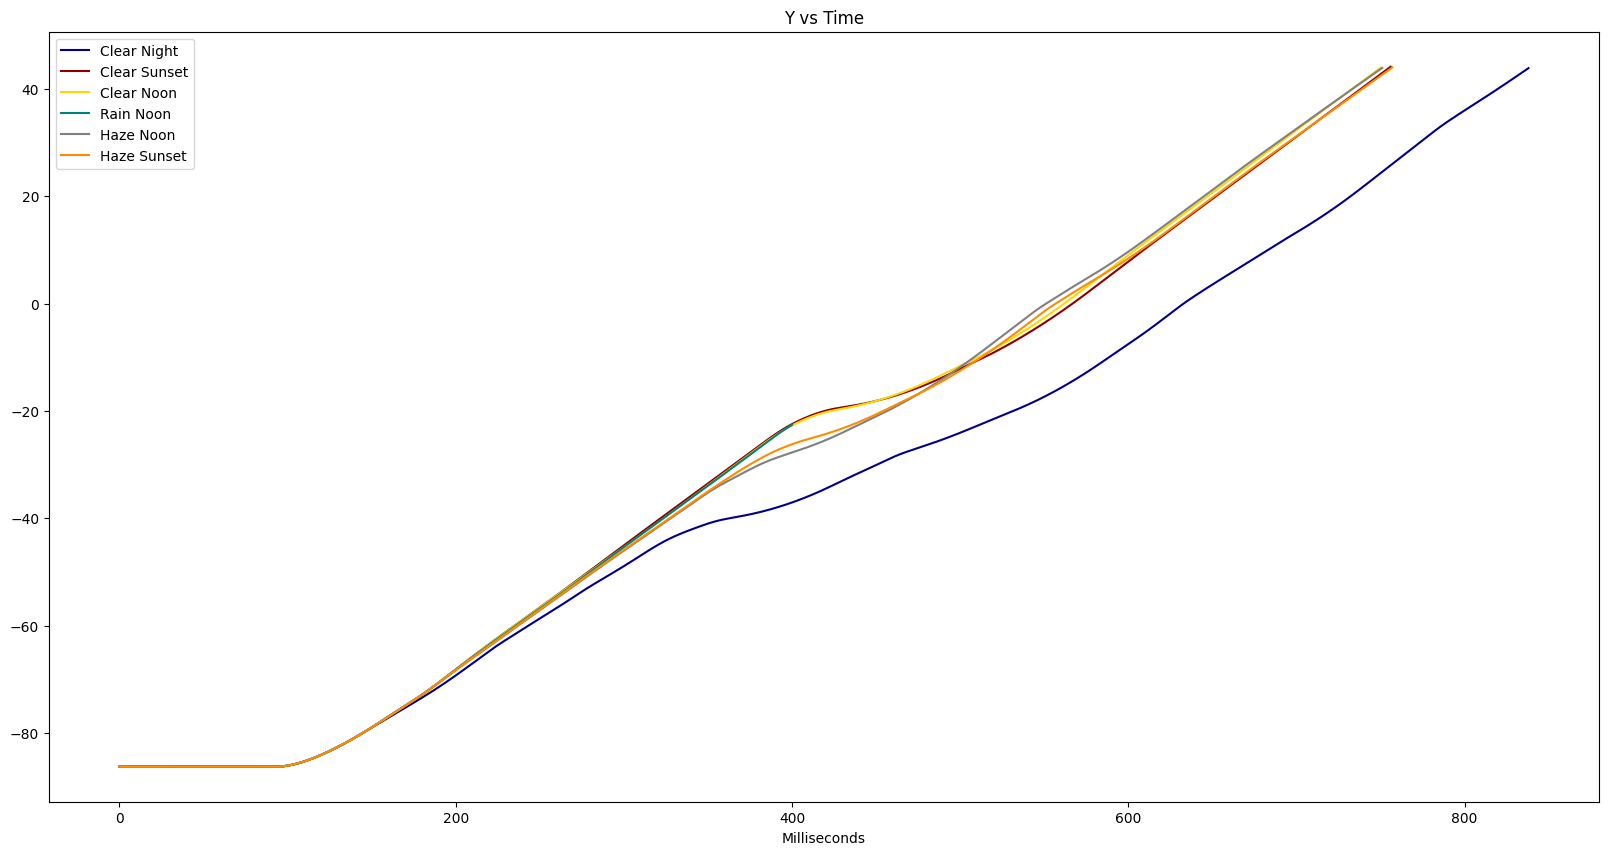

In [19]:
## Y vs Time
plt.figure(figsize=(20,10))

plt.title("Y vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['y'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['y'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['y'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['y'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['y'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['y'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/y_time.png")
plt.show()

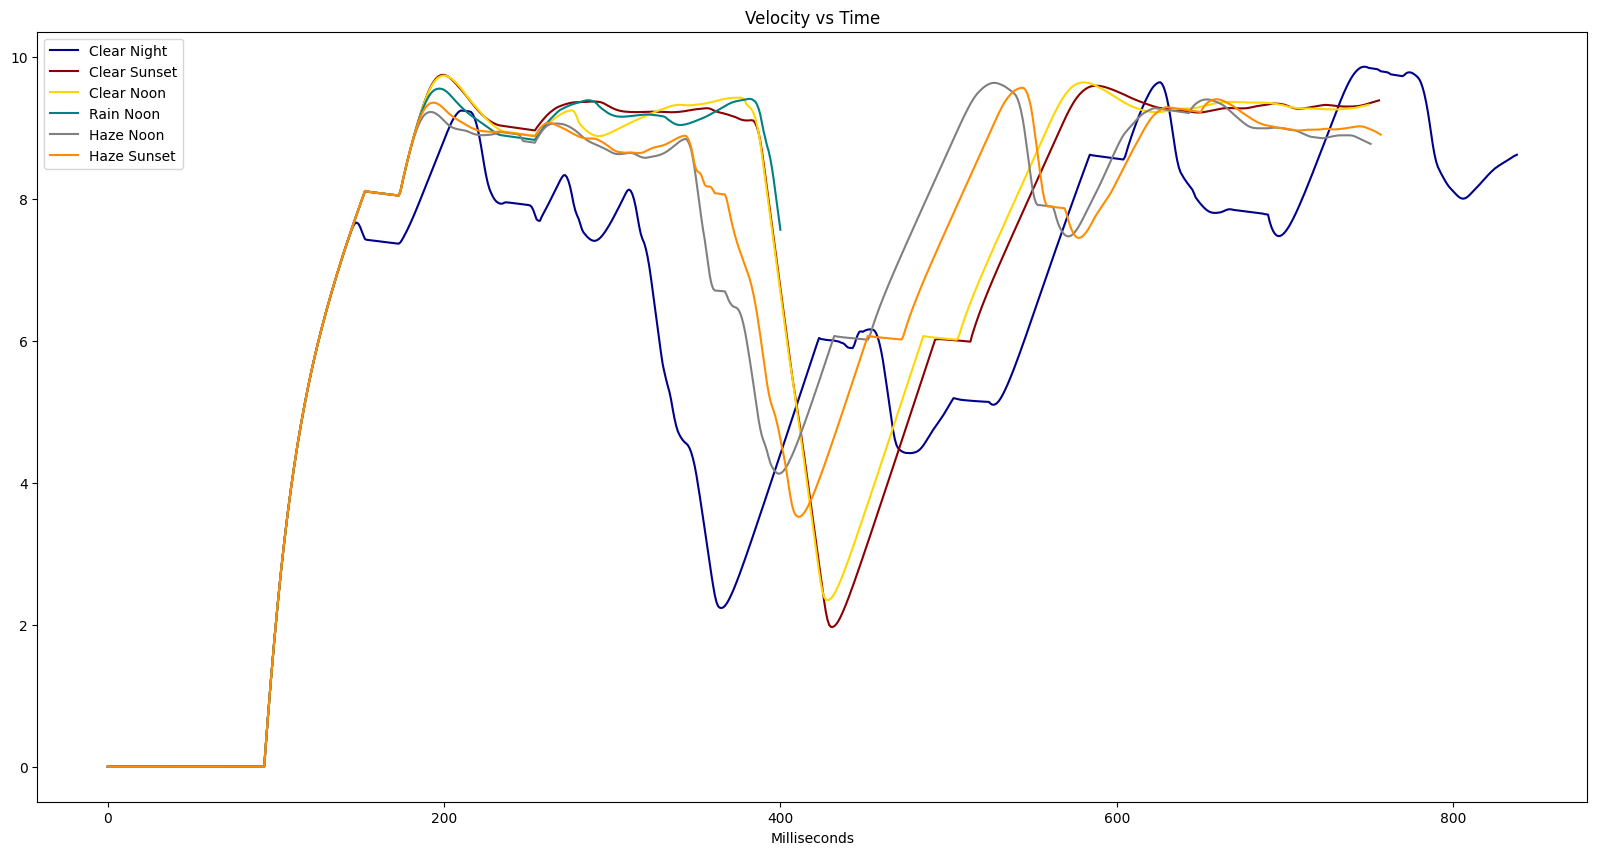

In [20]:
## Velocity vs Time
plt.figure(figsize=(20,10))

plt.title("Velocity vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['v'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['v'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['v'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['v'],color='teal',label="Rain Noon")
plt.plot(time[:haze_noon.shape[0]],haze_noon['v'],color='grey',label="Haze Noon")
plt.plot(time[:haze_sunset.shape[0]],haze_sunset['v'],color='darkorange',label="Haze Sunset")

plt.legend()
# plt.savefig("Figures/velocity_time.png")
plt.show()

**4. Based on your intuition and life experience, which of the features do you think will change during an accident? How will the feature(s) change? By looking at the plots you generated in Task 1.3, combined with your reasoning (without looking at ‘route_highway.txt’), which weather condition(s) has an accident? (1 point)**

- throttle: would expect to decrease or go to zero
- velocity: would expect to suddenly drop
- steer: direction may or may not change
- brake: may or may not change depending on the abruptness of the crash. Most likely sudden brake before impact if noticed
- x: correlated to steering, would expect a sudden change when merging to another lane
- y: expect a change in slope when accelerating or braking
- cvip: would expect it to go to zero before the crash


Based on the throttle, steering, and x-change of the car in the clear night scenario, we would predict a crash in that condition.

### Task 2

**1. Suppose each simulation run has a result of accident/non-accident, calculate the probability of accident (counts, marginal probability). Hint: for each run, the collision results are stored in ‘route_highway.txt’. You can check the accident status by looking at the ‘status’ field under the ‘record’ section (‘Completed’ means no accident; ‘Failed’ means an accident has occurred). (1 point)**

Our data includes 6 simulations in distinct weather conditions. There was only one recorded crash, which took place in the rain-noon simulation. Therefore, without knowing the weather conditions, the probability of a crash in any given condition would be $1/6$.

**2. By looking at the completion records and the plots you generated in Task 1, under which weather condition(s) did the accident happen? Does that match your guess in Task 1? When did the accident happen during those simulation runs? Why do you think the accident happened at that instance? Discuss each accident case separately. (2 points)**

The crash occured in the rain-noon weather condition, which does not match our prediction from above. It took place slightly after 400 milliseconds into the simulation. The graphs give no obvious insight into why the crash occured exactly at that time. Some minor observations from the plots include the following: 
- Insufficient breaking: the graph reveals that the vehicle did not break consistently during the time right before the crash. Additionally, it began breaking later than in the other cases. This lines up with what we viewed in the simulation through Carla.
- Throttle: From the throttle vs time graph, we can see the vehicle accelerating immediately preceeding the crash.
- Cvip: The EV remained consistenly close to the risky NPC actor throughout the duration of the simulation.

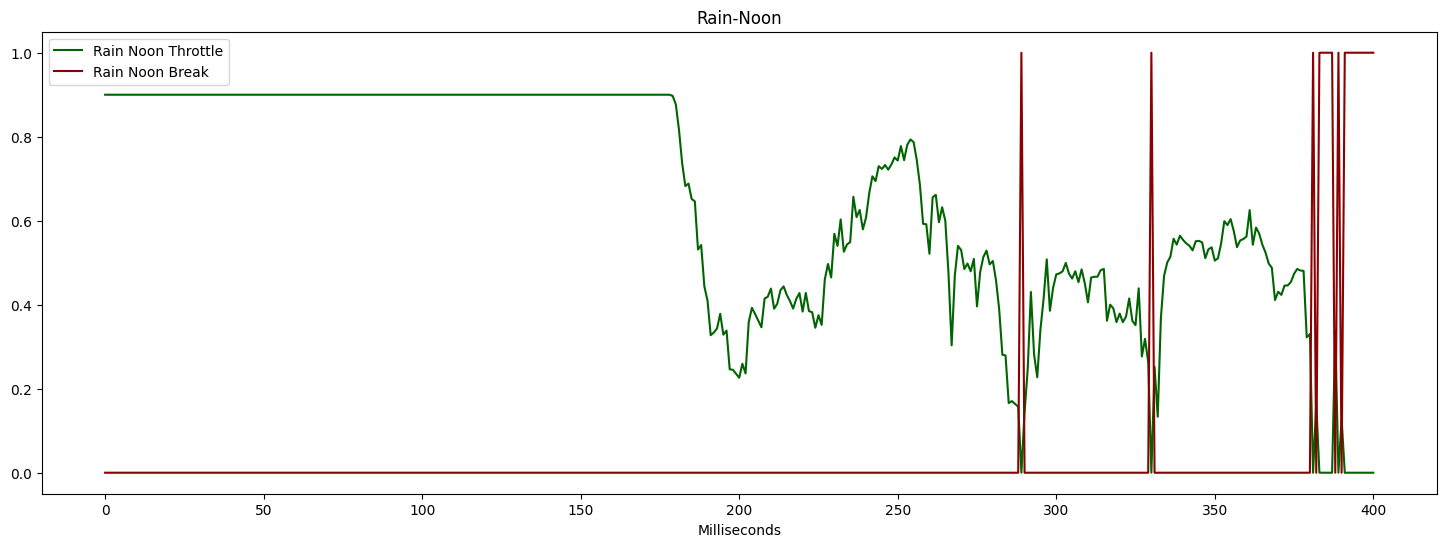

In [21]:
# Rain breaking
plt.figure(figsize=(18,6))

plt.title("Rain-Noon")
plt.xlabel("Milliseconds")

plt.plot(time[:rain_noon.shape[0]],rain_noon['throttle'],color='darkgreen',label="Rain Noon Throttle")
plt.plot(time[:rain_noon.shape[0]],rain_noon['brake'],color='darkred',label="Rain Noon Break")

plt.legend()
# plt.savefig("Figures/rain_noon_throtte_break.png")
plt.show()

**3. Accidents are caused by abnormal AV behavior. However, there are other adverse driving conditions when there are abnormal AV behaviors while no accident occurs. From the plots you generated in Task 1.3, do you observe any other abnormal behavior? If so, what do you think is (are) the cause(s) of this behavior? (2 points)**

In the clear night weather condition, the EV displayed atypical behavior. This includes:
- consistenly lower speeds
- lane change
- jittery steering, even before lane change
- throttle usage very jumpy, typically either fully on or fully off
- maintains maximum distance from NPC actor

We believe many of these observations are due to EV nighttime programmed behavior probably being more risk-adverse and aware of surroundings.

**4. In this question, we explore differences between abnormal and normal runs. Complete the following questions (6 points)**
>**a. We study the following features: “brake”, “steer”, “v”, “y”, “x”, “cvip”, “throttle”. Plot the distribution of each feature for the abnormal runs (including the accident runs) vs normal runs. Treat the values at each time point as an independent individual sample and generate the density plot of the distribution. Describe the difference between the “steer” distribution for normal and abnormal runs.**

In [22]:
normal = pd.concat([clear_noon[['brake','steer','v','y','x','cvip']],
                    clear_sunset[['brake','steer','v','y','x','cvip']],
                    haze_noon[['brake','steer','v','y','x','cvip']],
                    haze_sunset[['brake','steer','v','y','x','cvip']]]).reset_index(drop=True)
abnormal = pd.concat([clear_night[['brake','steer','v','y','x','cvip']],rain_noon[['brake','steer','v','y','x','cvip']]]).reset_index(drop=True)

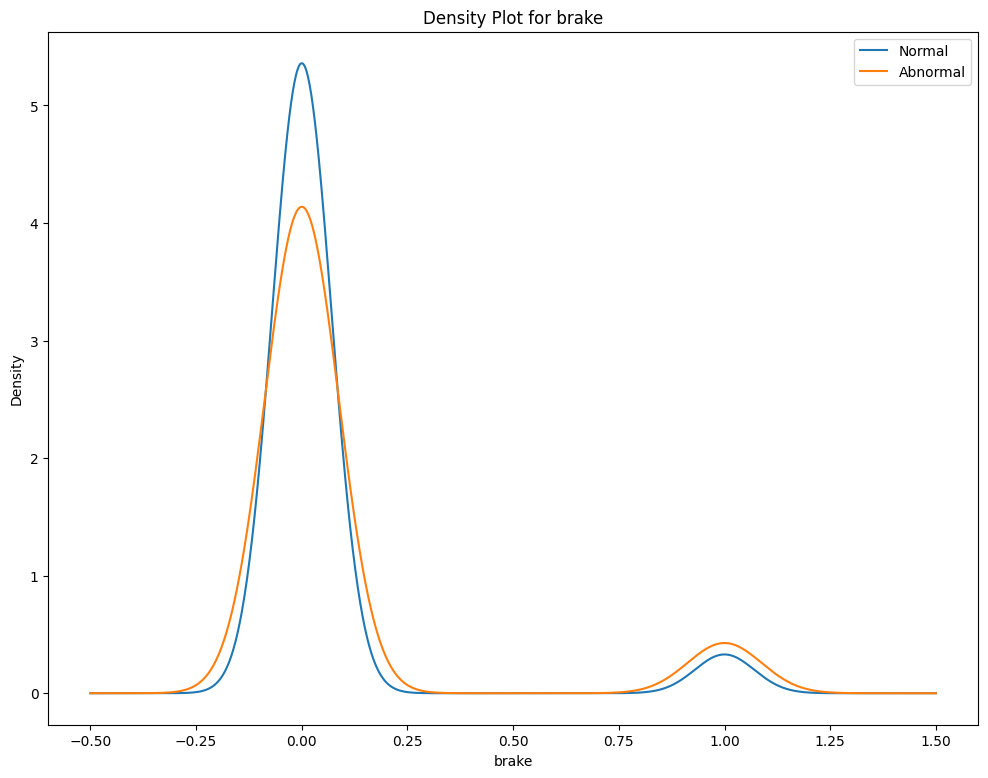

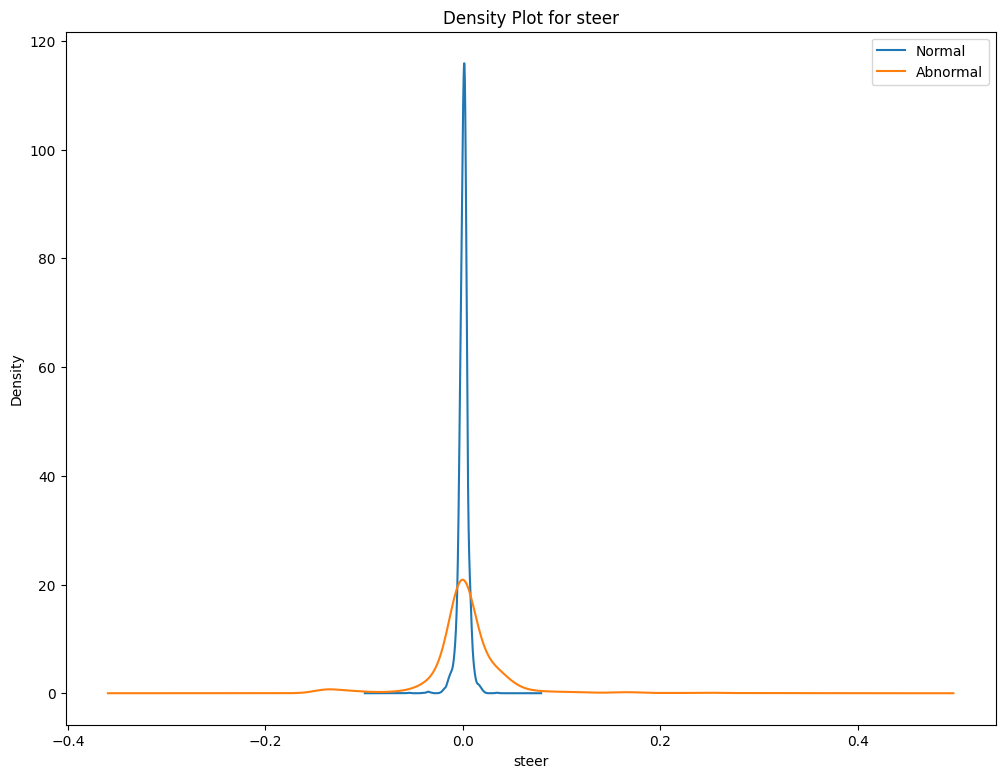

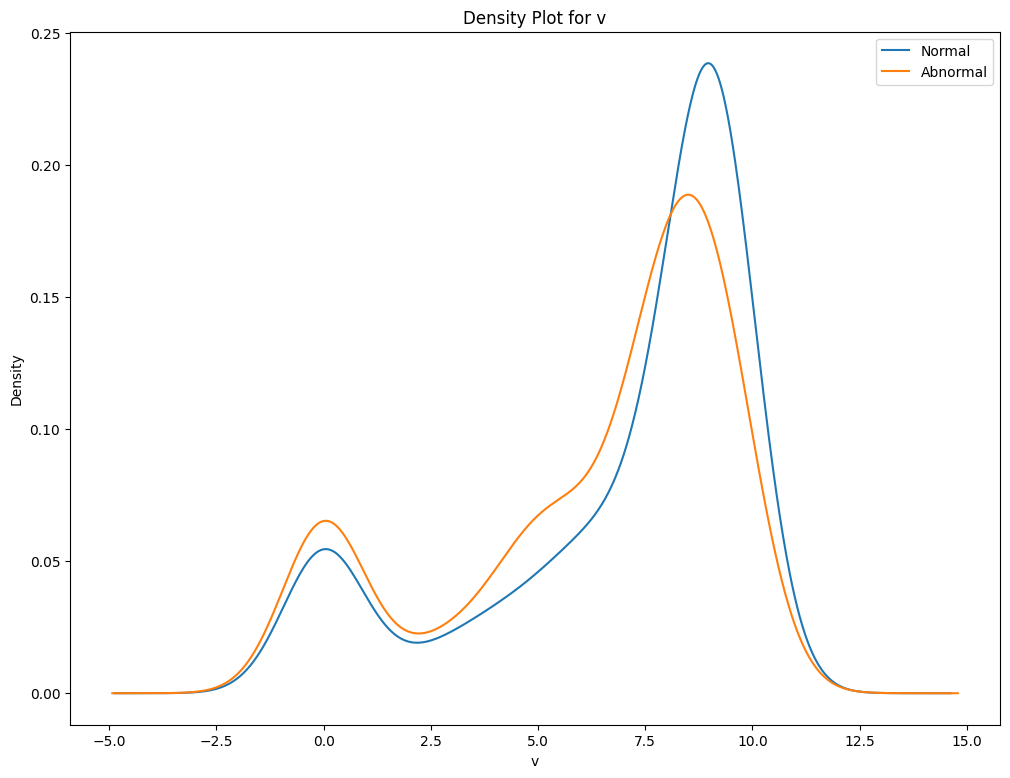

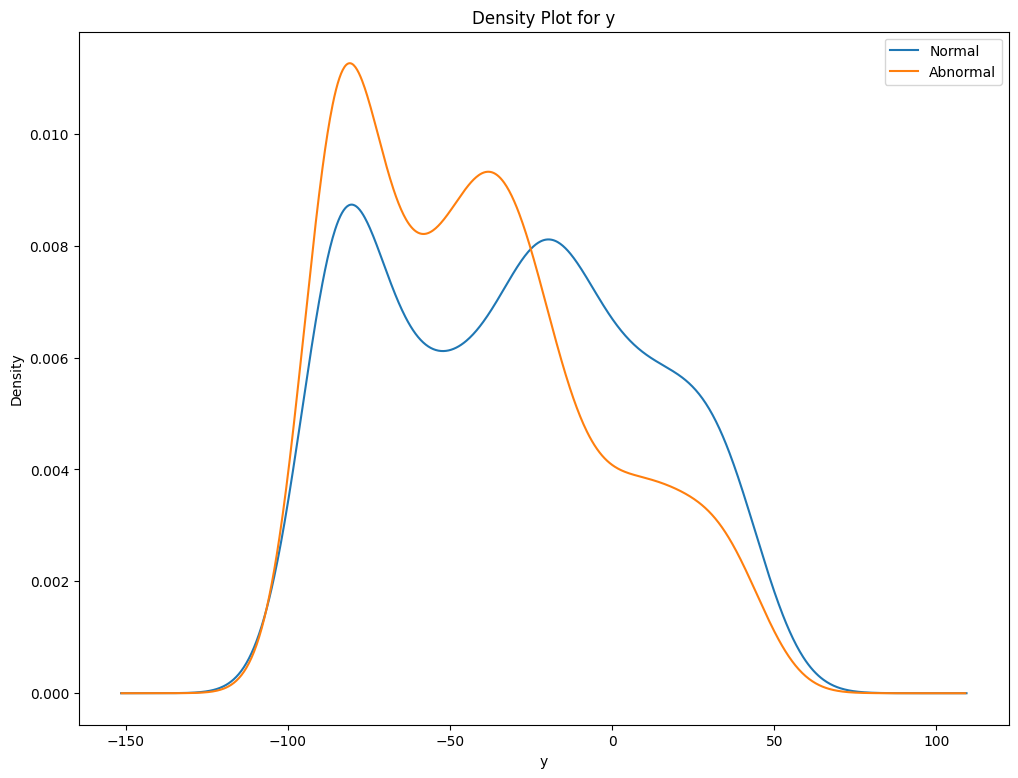

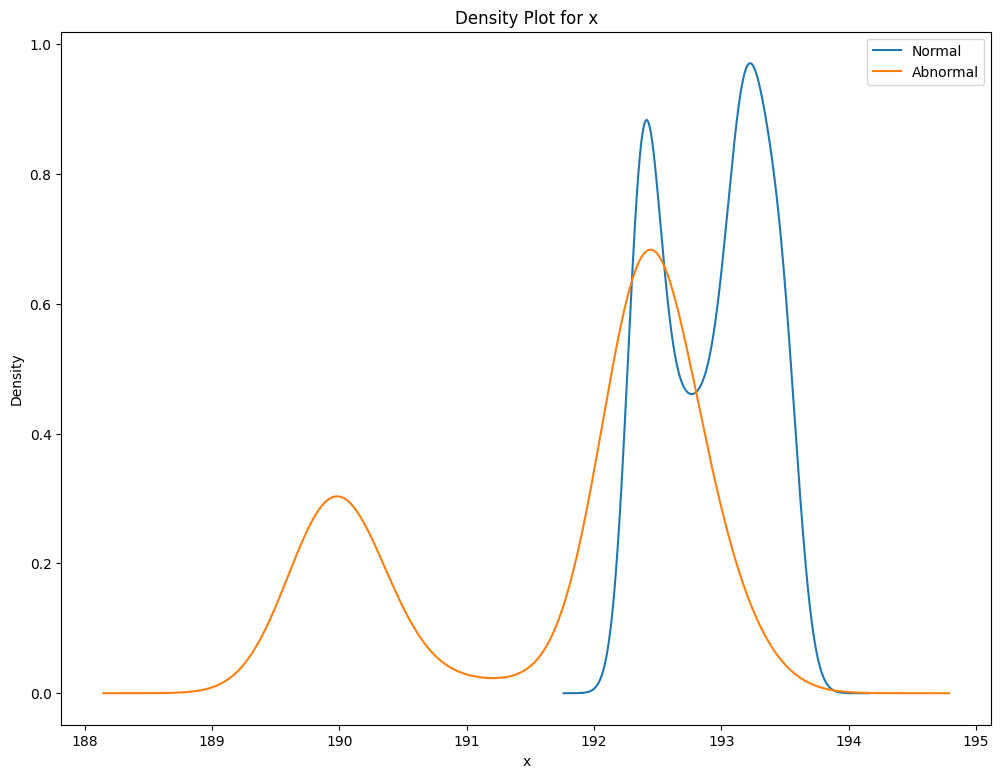

In [23]:
normal['runtype'] = 0
abnormal['runtype'] = 1

features = ['brake','steer','v','y','x','cvip']
for f in features:
    plt.figure(figsize=(12,9))
    
    normal[f].plot.kde(label='Normal', bw_method=0.3)
    abnormal[f].plot.kde(label='Abnormal', bw_method=0.3)
    
    plt.title(f'Density Plot for {f}')
    plt.xlabel(f'{f}')
    plt.ylabel('Density')
    plt.legend()
    
    # plt.savefig(f"Figures/{f}_normal_vs_abnormal.png")
    plt.show()

Comparing the steering between the normal and abnormal runs, there were two primary differences.
- The normal runs had a higher density close to zero. This is because these EVs stayed in the same lane, as opposed to in one of the abnormal cases (clear_night) where the EV changed lanes. 
- Greater variance in steering for abnormal runs, due to the same reason as above.

>**b. To study differences between normal and abnormal runs, you will use 2- sample t-test. In this part, apply the 2-sample t-test on the ‘steer’ values of abnormal runs vs normal runs:**
>
>>**i. State the null and alternative hypotheses.**
>>
>>**ii. Perform the test and calculate test statistics.**
>>
>>**iii. Assume a significance level of 0.05, what is your conclusion?**
>>
>**Note: Be sure to compare the variances of the two groups to decide
which version of the t-test to use**

#### 2-sample t-test on the ‘steer’ values of abnormal runs vs normal runs

$H_0$: There is no significant difference between the steering variable population means between the normal and abnormal runs.  
$H_1$: There is a significant difference between the steering variable population means between the normal and abnormal runs.

$\alpha$=0.05


In [24]:
## Two-sided T-test (using sample variances) with Scipy

t, p = scipy.stats.ttest_ind(normal['steer'],abnormal['steer'])

print(f'T-statistic: {t}')
print(f'P-value: {p}','\n')

if p<0.05:
    print("There exists significant evidence to reject the Null Hypothesis.")
else:
    print("Failed to reject Null Hypothesis.")

T-statistic: -2.059574394684549
P-value: 0.03949993360519476 

There exists significant evidence to reject the Null Hypothesis.


>**c. Does the testing result contradict your observation on the “steer” feature in part 4.a? Why?**

This outcome contradicts our intuition as both the normal and abnormal distributions appear to have means centered very close to zero. Thus, we originally thought that there wouldn't be a significant difference between their means.

**5. Among the features (‘throttle’, ‘brake’, ‘steering’, ‘cvip’, ‘x’, ‘y’, ‘v’), some of them are better indicators of abnormal AV behavior. (4 points)**
>**a. By looking at the distribution plots of the features in Task 2.4, can you identify these indicators? Explain your choice.**

- Steer - The normal runs had a higher density closer to zero and the abnormal had a higher variance and spread.

- X and Cvip - The abnormal plot shows two local maximums, one indicating a closer distance to the NPC actor and the other indicating a farther distance which was the response during the clear-night run where the EV changed lanes.


>**b. For the fields you identified as good accident indicators above, are they related (Calculate the Pearson correlation coefficient between each pair of the indicators to justify your answer)? If so, how does that affect the predicting power of using one indicator versus using all of them?** 

In [25]:
data_full = pd.concat([normal,abnormal])

In [26]:
## steer, x, cvip
corr_steer_x = scipy.stats.pearsonr(data_full['steer'],data_full['x']).statistic
corr_steer_cvip = scipy.stats.pearsonr(data_full['steer'],data_full['cvip']).statistic
corr_cvip_x = scipy.stats.pearsonr(data_full['cvip'],data_full['x']).statistic

print(f"Pearson Correlations\n\nSteering and x: {corr_steer_x}\nSteering and cvip: {corr_steer_cvip}\ncvip and x: {corr_cvip_x}")

Pearson Correlations

Steering and x: 0.16049701319159093
Steering and cvip: -0.06898881039039098
cvip and x: -0.3015787487970796


Although we don't have enough collinearity with these features to have a major negative difference in the predicting power, in general we would want to avoid using features with higher correlation since it would take away from the predicting power by skewing the data. Of the above options, cvip and x are the most correlated and it may be redundant to include them both. That being said, since these features are relatively independent, using all of them would give us more predicting power than just using one of them.


**6. Among the better indicators of abnormal behavior that you identified in Task 2.5, choose the one with the strongest predictive power. In this question, we want to use the Kolmogorov–Smirnov two-sample test to verify whether that indicator is indeed a good indicator of abnormal AV behavior. (5 points)**

In [27]:
## T Test for the 'better indicators' to determine which feature has the strongest predictive power.
features = ['steer','x','cvip']

for f in features:
    print(f)
    t, p = scipy.stats.ttest_ind(normal[f],abnormal[f])

    print(f'T-statistic: {t}')
    print(f'P-value: {p}','\n')

steer
T-statistic: -2.059574394684549
P-value: 0.03949993360519476 

x
T-statistic: 50.06248806162103
P-value: 0.0 

cvip
T-statistic: -6.468997424873898
P-value: 1.0980157019780513e-10 



It appears the strongest predictor is x location.

>**a. Construct the null and the alternative hypothesis and state them below.**
>
>**b. Perform the KS two-sample test and calculate its statistics.**
>
>**c. Assuming a significance level of 0.05, what is your conclusion?**

#### 2-sample KS on the ‘x’ values of abnormal runs vs normal runs


$H_0$: There is no significant difference between the x variable distributions between the normal and abnormal runs.  
$H_1$: There is a significant difference between the x variable distributions between the normal and abnormal runs.

$\alpha$=0.05

In [28]:
## Using x
t, p = scipy.stats.kstest(normal['x'],abnormal['x'])
print(f'T-statistic: {t}')
print(f'P-value: {p}','\n')

if p<0.05:
    print("There exists significant evidence to reject the Null Hypothesis.")
else:
    print("Failed to reject Null Hypothesis.")

T-statistic: 0.5740786464011629
P-value: 2.6613101312928488e-269 

There exists significant evidence to reject the Null Hypothesis.


>**d. Repeat the same test on a feature that you did not select as an indicator of abnormal behavior in Task 2.5. What is your conclusion?**

#### 2-sample KS on the ‘brake’ values of abnormal runs vs normal runs

$H_0$: There is no significant difference between the brake variable distributions between the normal and abnormal runs.  
$H_1$: There is a significant difference between the brake variable distributions between the normal and abnormal runs.

$\alpha$=0.05

In [29]:
## Using brake
t, p = scipy.stats.kstest(normal['brake'],abnormal['brake'])
print(f'T-statistic: {t}')
print(f'P-value: {p}','\n')

if p<0.05:
    print("There exists significant evidence to reject the Null Hypothesis.")
else:
    print("Failed to reject Null Hypothesis.")

T-statistic: 0.03556296628829175
P-value: 0.210072458272195 

Failed to reject Null Hypothesis.


>**e. What are the major differences between the KS test and the t-test?**

Some of the major differences between the t-test and KS test include the following:

- T-test:
    - Measures the difference in means.
    - Used to determine whether two groups have different true means.
    - Statistic calculated with the pooled standard error and the number of observations in each group.
- KS-test:
    - Measures the maximum difference between CDFs of two samples.
    - Determines whether samples are drawn from different distributions.
    - Incorporates number of observations but NOT pooled standard error, or any measure of spread.

The t-test looks squarely at the means, though still taking account for variance (standard error) and group size. The KS-test looks at the distribution as a whole and any large discrepancies within. 

**7. Keeping in mind that this experiment is executed over a period of time, what assumption did you make when using the KS two-sample test on the distributions in Task2.6? Are you able to come up with one situation where this assumption fails? (2 points)**

The assumption we took was that all variables are independent to properly take the KS two-sample test on the distributions of task2.6. This means treating the data as if each moment in the simulation is independent of the previous one when actually it is not. This assumption fails when events happening in the simulation are dependent on the ones that happened before, for example, the braking part of the simulation. As the AV has a reaction time, as he sees the car beginning to cut him off (t-1) in timeframe t he reacts in a way that is dependent on t-1 and initiating breaking, making v, the throttle, braking, and cvip at time t also dependent at time t-1 therefore making this assumption fail.

**8. The dynamic-time-wrapper (DTW) is a method to compare two time-series data (such as the control and the trajectory data collected in our simulation). Use the DTW package in python (dtaidistance · PyPI), and apply the DTW distance on the two time-series dataset (using steering data of clear-noon as a reference): (1) steering data of clear-night and (2) steering data of clear-sunset. What can you say about the DTW distance for (1) and (2) with respect to the reference? (3 points)**

In [30]:
s1 = np.array(clear_noon['steer'])

In [31]:
s2 = np.array(clear_night['steer'])
d_clear_night = dtw.distance_fast(s1, s2)
print("steering data of clear-night")
print(d_clear_night)

steering data of clear-night
1.17603264771516


steering data of clear-sunset

In [32]:
s2 = np.array(clear_sunset['steer'])
d_clear_sunset = dtw.distance_fast(s1, s2)
print("steering data of clear-sunset")
print(d_clear_sunset)

steering data of clear-sunset
0.050521340023401175


There is a relatively low DTW distance between the steering data of clear-sunset and the reference compared to clear-night and reference. Thus, the steering data for clear-sunset is more similar to the reference (clear-noon) than clear-night.

# MP 1: Safety Analysis of Autonomous Vehicles
## Part 2: Real-World Records
Group 9: 
- Zach Larson (zlarson2)
- Máximo Rojas (mgr9)
- Matthew Paul (mjpaul3)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy

In [34]:
av_data = pd.read_csv("Data Part2/mp1_av_disengagements.csv")
print(av_data.shape)
av_data.head()

(1024, 7)


Month                Car      Location Weather TypeOfTrigger  \
0  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
1  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
2  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
3  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
4  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   

   ReactionTime                              Cause  
0          0.58  Incorrect Traffic Light Detection  
1          0.66    Adverse road surface conditions  
2          1.93        Position Estimation Failure  
3          0.65                  Emergency Vehicle  
4          0.64    Adverse road surface conditions

## Task 3

Given below are some assumptions that you will need to do the analysis for this task.
1. There can be at most one disengagement per mile.
2. The total amount of miles driven by all the AVs in the dataset is 505229 miles.
3. A day can be either clear or cloudy, but not both. The probability of a day being
clear in California is 72% [7].
4. The AV is equally likely to drive on a cloudy day as on a clear day
<br>
<br>
__________________________________________________
<br>

**1. Based on the above assumptions, answer the following questions on basic probability. (6 points)**

>**a. The assumption of at most one disengagement per mile allows us to treat
the occurrence of a disengagement in a mile as a random variable with a
__ __BERNOULLI__ __ distribution**

>**b. Based on the above assumptions, calculate the probability of
disengagement per mile on a cloudy day. (1 point)**

In [35]:
## 1024 disengagements / 505229 miles
p_disengagement = 1024/505229
p_cloudy_given_disengagement = av_data[av_data['Weather']=='cloudy'].shape[0] / 1024

## P(Disengagement | Cloudy) = P(Cloudy | Disengagement) * P(Disengagement) / P(Cloudy)
p_disengagement_given_cloudy = (p_cloudy_given_disengagement*p_disengagement)/(1-0.72)
print("Probability of Disengagement Per Mile: ",p_disengagement)
print("Probability of Disengagement Per Mile on a Cloudy Day: ",p_disengagement_given_cloudy)

Probability of Disengagement Per Mile:  0.002026803687040926
Probability of Disengagement Per Mile on a Cloudy Day:  0.00590255677552725


>**c. Based on the above assumptions, calculate the probability of
disengagement per mile on a clear day. (1 point)**

In [36]:
p_clear_given_disengagement = av_data[av_data['Weather']=='clear'].shape[0] / 1024

p_disengagement_given_clear = (p_clear_given_disengagement*p_disengagement)/(0.72)
print("Probability of Disengagement Per Mile on a Clear Day: ",p_disengagement_given_clear)

Probability of Disengagement Per Mile on a Clear Day:  0.0005195663748517999


>**d. Similarly, calculate the probability of an automatic disengagement per mile
on a cloudy day, and the probability of an automatic disengagement per mile on a
clear day. (1 point)**

In [37]:
automatic_disengagements = av_data[av_data['TypeOfTrigger']=='automatic']

p_automatic_disengagement = automatic_disengagements.shape[0] / 505229
p_cloudy_given_automatic_disengagement = automatic_disengagements[automatic_disengagements['Weather']=='cloudy'].shape[0]/  \
                                            automatic_disengagements.shape[0]
p_clear_given_automatic_disengagement = automatic_disengagements[automatic_disengagements['Weather']=='clear'].shape[0]/  \
                                            automatic_disengagements.shape[0]
                                            
p_automatic_disengagement_given_cloudy = (p_cloudy_given_automatic_disengagement*p_automatic_disengagement)/(1-0.72)
p_automatic_disengagement_given_clear = (p_clear_given_automatic_disengagement*p_automatic_disengagement)/(0.72)

print("Probability of Automatic Disengagement Per Mile: ",p_automatic_disengagement)
print("Probability of Automatic Disengagement Per Mile on Cloudy Day: ",p_automatic_disengagement_given_cloudy)
print("Probability of Automatic Disengagement Per Mile on Cloudy Day: ",p_automatic_disengagement_given_clear)

Probability of Automatic Disengagement Per Mile:  0.0009757951344835708
Probability of Automatic Disengagement Per Mile on Cloudy Day:  0.0028063653172267283
Probability of Automatic Disengagement Per Mile on Cloudy Day:  0.00026390673008345393


>**e. How likely is it that there are 100 or more disengagements in 10,000 miles
under cloudy conditions? (hint: use Central Limit Theorem) (2 points)**

Given Random variable $X_i$ ~ Bernoulli($p = 0.0059$), we know that as $n \rightarrow \infty$:

$P(\frac{\sum{X_i} - n\mu}{\sigma\sqrt{n}} \leq a) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{a} e^{\frac{-x^2}{2}} dx$ 

We want: $P(X_1 + ... + X_{10000} \geq 100) = 1 - P(X_1 + ... + X_{10000} \leq 99)$

To achieve the form above, have that: $\sum(X_i) \leq (\sigma\sqrt{n})a + n\mu = 99$ 

With $n=10000, \ \mu = p = 0.0059, \ \sigma = \sqrt{p(1-p)} = 0.0766$

In [38]:
n = 10000
p = 0.0059
sigma = 0.0766

A = (99 - (n*p))/(sigma*np.sqrt(n))
print("a =",A)

prob = 1 - ( (1/np.sqrt(2*np.pi)) * scipy.integrate.quad(func=lambda x: np.exp((x**2)/-2),
                                                  a=-np.inf,b=A)[0] )
print("Probability of 100 or more disengagements in 10000 miles =",round(prob,10))

a = 5.221932114882507
Probability of 100 or more disengagements in 10000 miles = 8.85e-08


**2. Assuming that the disengagement per mile is a random variable with the
distribution you answered in Task 3.1.a, and the weather condition is cloudy. (6
points)**

Disengagement per mile $X$ ~ Bernoulli $(p=0.0059)$

>**a. What is the distribution of “the number of miles until the next
disengagement”? Explain your reasoning. Calculate and state the values of the
parameters of the distribution. (1 points)**

This would follow a geometric distribution, as this distribution captures the waiting time until the first occurrence of an event -- in this case, a disengagement. Our 'waiting time' in this scenario is miles driven. After each occurrence, we 'reset' with a new random variable, so that our random variable always represents the time before the first disengagement in its lifetime. 

$X$ ~ Geom $(p=0.0059)$

$\mu = \frac{1}{p} = 169.4915$

$\sigma = \sqrt{\frac{1-p}{p^2}} = 168.9908$

>**b. What is the distribution of “the number of disengagements in 10,000 miles”?
(hint: this is equivalent to drawing n=10,000 independent trials from the
distribution of disengagement per mile you calculated from Task 3.1.a). Calculate
and state the values of the parameters of the distribution. (1 points)**

This would follow a binomial distribution, as it is simply a yes/no decision, but with $n=10000$ trials. 

$X$ ~ Binom $(n=10000,p=0.0059)$

>**c. Notice that the number of disengagements “𝒏" in Task 3.2.b is large while
the probability of disengagement per mile "𝒑" is very small, what distribution does
your answer in Task 3.2.b approximate? Calculate and state the values of the
parameters of the distribution. (1 points)**

This would approximate a Poisson distribution where $\lambda = np = 59$

>**d. Plot the probability mass function (PMF) of the distribution in Task 3.2.b and
Task 3.2.c for: 1 - The x-axis ranging between 0 and 10000. 2 - The x-axis ranging between 0 and 100.
Describe the plots and discuss your findings. (2 points)**

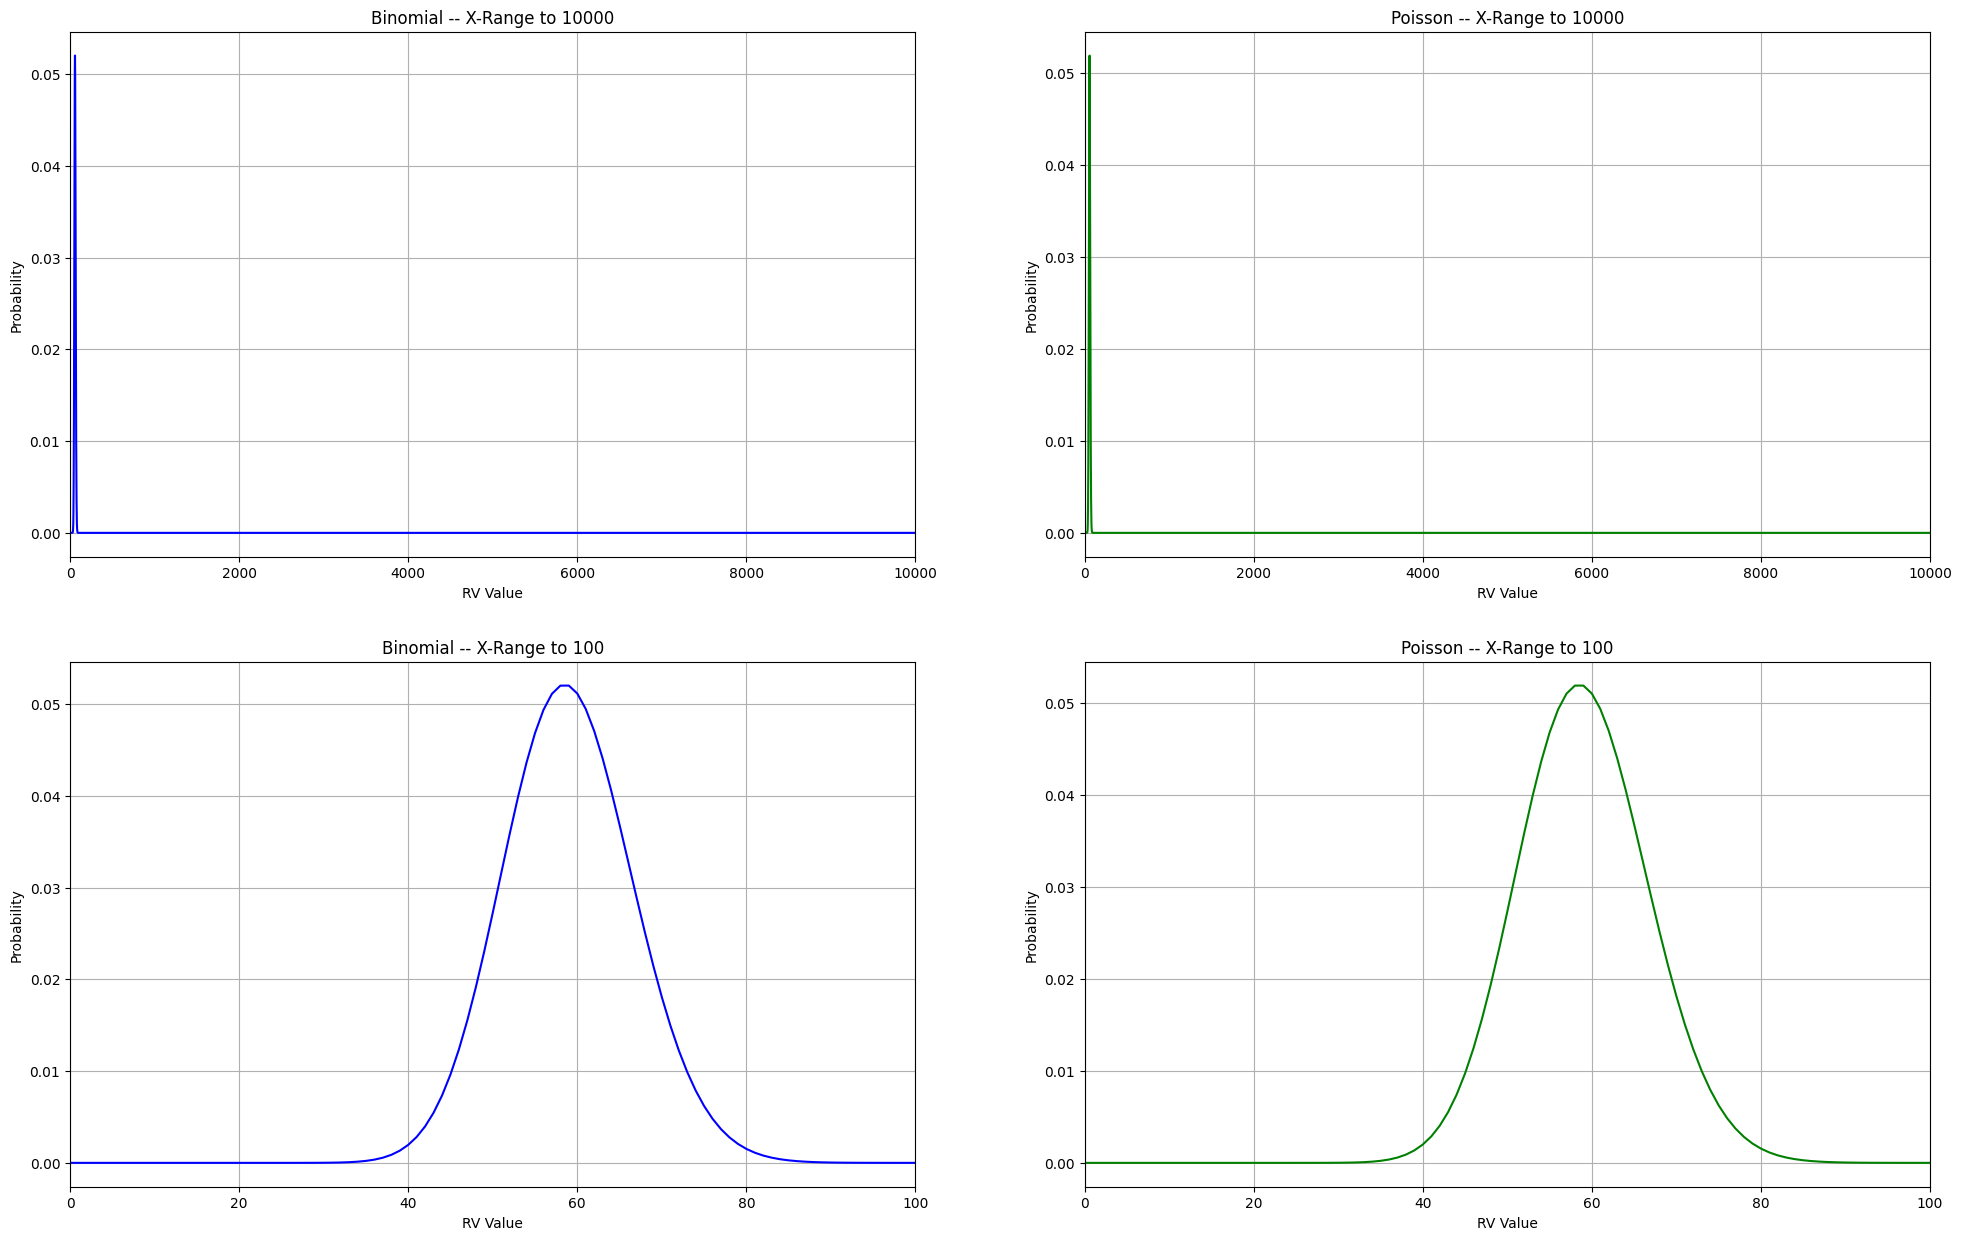

In [39]:
## 1
n = 10000
p = 0.0059
lam = 59

x = np.arange(0,n+1,1)
y_binom = scipy.stats.binom.pmf(x,n,p)
y_pois = scipy.stats.poisson.pmf(x,lam)

fig, axs = plt.subplots(2, 2, figsize=(24,15))

axs[0][0].plot(x, y_binom, 'blue', ms=2)
axs[0][0].set_title('Binomial -- X-Range to 10000')
axs[0][0].set_xlim(0,10000)
axs[0][0].set_xlabel('RV Value')
axs[0][0].set_ylabel('Probability')
axs[0][0].grid()

axs[0][1].plot(x, y_pois, 'green', ms=2)
axs[0][1].set_title('Poisson -- X-Range to 10000')
axs[0][1].set_xlim(0,10000)
axs[0][1].set_xlabel('RV Value')
axs[0][1].set_ylabel('Probability')
axs[0][1].grid()

axs[1][0].plot(x, y_binom, 'blue', ms=2)
axs[1][0].set_title('Binomial -- X-Range to 100')
axs[1][0].set_xlim(0,100)
axs[1][0].set_xlabel('RV Value')
axs[1][0].set_ylabel('Probability')
axs[1][0].grid()

axs[1][1].plot(x, y_pois, 'green', ms=2)
axs[1][1].set_title('Poisson -- X-Range to 100')
axs[1][1].set_xlim(0,100)
axs[1][1].set_xlabel('RV Value')
axs[1][1].set_ylabel('Probability')
axs[1][1].grid()

plt.show()


The CDF plots for the binomial distribution, and the approximated Poisson distribution, are essentially identical. The mean of both is 59, and the spread, i.e. variance/bell curvature are similar as well. This goes to show that when modelling for a large number of miles, the binomial and poisson distributions both adequately represent the distribution for the number of disengagements.

>**e. Solve Task 3.1.e by using the cumulative distribution function (CDF) of the
distribution you computed in Task 3.2.c and compare the results. Discuss your
findings. (1 points)**

In [40]:
value = scipy.stats.poisson.pmf(100,lam)
print("Self-Calculated Value: ",round(prob,10))
print("Distribution-Calculated Value: ",round(value,10))

Self-Calculated Value:  8.85e-08
Distribution-Calculated Value:  3.103e-07


These findings make sense, as the expectation for disengagements in 10000 miles driven, considering both the poisson and binomial distributions, was 59. One hundred disengagements is well outside of the range of reasonable values. 

**3. What’s the conditional probability that the reaction time is: (4 points)**

>**a. Greater than 0.4s given that the weather was cloudy? Reaction time is
measured only in cases where there was an automatic disengagement. (2
points)**

In [41]:
automatic_disengagements.head()

Month                Car      Location Weather TypeOfTrigger  \
0  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
1  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
2  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
3  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
4  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   

   ReactionTime                              Cause  
0          0.58  Incorrect Traffic Light Detection  
1          0.66    Adverse road surface conditions  
2          1.93        Position Estimation Failure  
3          0.65                  Emergency Vehicle  
4          0.64    Adverse road surface conditions

In [42]:
P_cloudy = automatic_disengagements[automatic_disengagements['Weather']=='cloudy'].shape[0]/ \
            automatic_disengagements.shape[0]

rt_greater = automatic_disengagements[automatic_disengagements['ReactionTime']>0.4]
P_cloudy_given_greater = rt_greater[rt_greater['Weather']=='cloudy'].shape[0]/ \
                        rt_greater.shape[0]
                    
P_rt_greater = automatic_disengagements[automatic_disengagements['ReactionTime']>0.4].shape[0]/ \
                automatic_disengagements.shape[0]
                         
P_rt_greater_given_cloudy = (P_cloudy_given_greater*P_rt_greater) / (P_cloudy)
print("Probability of reaction time greater than 0.4 seconds, given cloudy weather: ", \
        P_rt_greater_given_cloudy)

Probability of reaction time greater than 0.4 seconds, given cloudy weather:  0.6120906801007557


>**b. Greater than 0.7s given that the weather was clear? Reaction time is
measured only in cases where there was an automatic disengagement. (2
points)**

In [43]:
P_clear = automatic_disengagements[automatic_disengagements['Weather']=='clear'].shape[0]/ \
            automatic_disengagements.shape[0]

rt_greater = automatic_disengagements[automatic_disengagements['ReactionTime']>0.7]
P_clear_given_greater = rt_greater[rt_greater['Weather']=='clear'].shape[0]/ \
                        rt_greater.shape[0]
                    
P_rt_greater = automatic_disengagements[automatic_disengagements['ReactionTime']>0.7].shape[0]/ \
                automatic_disengagements.shape[0]
                         
P_rt_greater_given_clear = (P_clear_given_greater*P_rt_greater) / (P_clear)
print("Probability of reaction time greater than 0.7 seconds, given clear weather: ", \
        P_rt_greater_given_clear)

Probability of reaction time greater than 0.7 seconds, given clear weather:  0.3854166666666667


**4. A study found that an automatic AV disengagement will result in an accident if
the human driver is slow in reacting. Following reactions are considered slow: (i) a
reaction time greater than 0.4s under cloudy conditions and, (ii) a reaction time
greater than 0.7s under clear conditions. Find the probability of an accident per mile
due to automatic AV disengagement and slow reaction. (2 points)**


    P(accident) = P(slow reaction) * P(autodisengagement)
    ASSUMING: disengagement + slow reaction ==> accident (always)

    P(slow reaction) = P(slow reaction|cloudy)*p(cloudy) + P(slow react|clear)*P(clear)

In [44]:
p_slow_react = (P_rt_greater_given_clear*P_clear) + (P_rt_greater_given_cloudy*P_cloudy)
p_accident = p_disengagement * p_slow_react

print("Probability of an accident: ",p_accident)

Probability of an accident:  0.0011511258263112764


**5. Next, you will investigate how to diagnose the cause of an AV disengagement
based on new observations. (4 points)**
>**a. An AV had a disengagement with a reaction time greater than 0.4s on a
cloudy day. What is the posterior probability that the root cause of the
disengagement was “Software Froze”? (2 points)**

P(SF | slow rt, cloudy) = P(slow rt, cloudy | SF) * P(SF) / P(slow rt, cloudy)

In [45]:
sf_disengagement = automatic_disengagements[automatic_disengagements['Cause']=="Software Froze"]
p_sf = sf_disengagement.shape[0] / automatic_disengagements.shape[0]
p_slow_cloudy = automatic_disengagements[(automatic_disengagements['Weather']=='cloudy') & (automatic_disengagements['ReactionTime']>0.4)].shape[0] / automatic_disengagements.shape[0]
p_slow_cloudy_given_sf = sf_disengagement[(sf_disengagement['Weather']=='cloudy') & (sf_disengagement['ReactionTime']>0.4)].shape[0] / sf_disengagement.shape[0]
p_software_froze_given_slow_react_cloudy = p_slow_cloudy_given_sf*p_sf/p_slow_cloudy

# Using Counts (same answer)
# slow_react_cloudy_dataframe = automatic_disengagements[(automatic_disengagements['Weather']=='cloudy') & (automatic_disengagements['ReactionTime']>0.4)]
# p_software_froze_given_slow_react_cloudy = (slow_react_cloudy_dataframe[slow_react_cloudy_dataframe['Cause']=="Software Froze"].shape[0]) / slow_react_cloudy_dataframe.shape[0]

print("Posterior probability (Slow, Software Froze, Cloudy): ", p_software_froze_given_slow_react_cloudy)

Posterior probability (Slow, Software Froze, Cloudy):  0.053497942386831275


>**b. What is the posterior probability that the root cause of the disengagement
was “Software Froze if the disengagement happened on a clear day with reaction
time greater than 0.7s. Based on the probabilities calculated in Tasks 3.5.a and
3.5.b, discuss your findings. (2 points)**

In [46]:
sf_disengagement = automatic_disengagements[automatic_disengagements['Cause']=="Software Froze"]
p_sf = sf_disengagement.shape[0] / automatic_disengagements.shape[0]
p_slow_clear = automatic_disengagements[(automatic_disengagements['Weather']=='clear') & (automatic_disengagements['ReactionTime']>0.7)].shape[0] / automatic_disengagements.shape[0]
p_slow_clear_given_sf = sf_disengagement[(sf_disengagement['Weather']=='clear') & (sf_disengagement['ReactionTime']>0.7)].shape[0] / sf_disengagement.shape[0]
p_software_froze_given_slow_react_clear = p_slow_clear_given_sf*p_sf/p_slow_clear

# Using Counts (same answer)
# slow_react_clear_dataframe = automatic_disengagements[(automatic_disengagements['Weather']=='clear') & (automatic_disengagements['ReactionTime']>0.7)]
# p_software_froze_given_slow_react_clear = (slow_react_clear_dataframe[slow_react_clear_dataframe['Cause']=="Software Froze"].shape[0]) / slow_react_clear_dataframe.shape[0]

print("Posterior probability (Slow, Software Froze, Clear): ", p_software_froze_given_slow_react_clear)

Posterior probability (Slow, Software Froze, Clear):  0.24324324324324326


The posterior probability of a disengagement being caused by frozen software is over 4 times higher when the weather is clear and reaction time greater than 0.7 seconds, than when the weather is cloudy and reaction time only greater than 0.4 seconds. 

$0.2432 / 0.0535 \approx 4.55$ (multiplicative factor) 

This makes sense intuitively, as a longer reaction time can indicate software issues, especially on a clear day where a longer lag time would not be expected, whereas in other conditions a longer time may be understandable.

**6. In this question, you will construct a Naive Bayes model to infer the root cause of
disengagement scenarios of AVs. Naive Bayes assumes that the factors are class
conditionally independent. We assume that both Location (urban-street or highway)
and Weather (cloudy or clear) are factors related to the Cause (consider the Cause
has 3 different values, “Software Froze”, “Hardware Fault” or “Other”), and Location
and Weather are independent given the Cause. Answer the following questions: (8
points)**
>**a. Draw a graph for the Naive Bayes model described in the question. (2
points)**

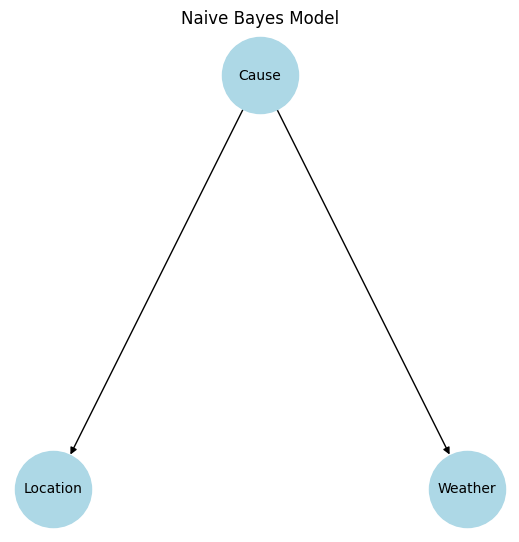

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

edges = [
    ('Cause', 'Location'), ('Cause', 'Weather') # A is the root node
]
G.add_edges_from(edges)

# Manually define positions
pos = {
    'Cause': (0, 1),
    'Location': (-1, 0),
    'Weather': (1, 0),
}

plt.figure(figsize=(5, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, arrows=True)

plt.title('Naive Bayes Model')
plt.show()


>**b. Count the number of parameters needed to define the Naive Bayes model
(including the prior and the conditional probability distributions). (2 points)**

Arbitrary Joint Distribution:  
(3 * 2 * 2) - 1 = 11 parameters

Naive Bayes Model:

P(O,L,W) = P(L|O)P(W|O)P(O)

P(L = urban-street | O = Software Froze), P(L = urban-street | O = Hardware Fault), P(L = urban-street | O = Other),

P(W = cloudy | O = Software Froze), P(W = cloudy | O = Hardware Fault), P(W = cloudy | O = Other),

P(O = Software Froze), P(O = Hardware Fault)

**8 Parameters**

>**c. Based on the number of parameters needed, derive, and show the
conditional probability tables and prior probability from the given dataset to infer
the Cause. (2 points)**

In [48]:
## Priors ##

# P(O = Software Froze)
sf_dataframe = automatic_disengagements[automatic_disengagements['Cause']=="Software Froze"]
p_sf = sf_dataframe.shape[0] / automatic_disengagements.shape[0]

# P(O = Hardware Fault)
hf_dataframe = automatic_disengagements[automatic_disengagements['Cause']=="Hardware Fault"]
p_hf = hf_dataframe.shape[0] / automatic_disengagements.shape[0]

# --- infered from  required parameters --- #

# P(O = Other)
o_dataframe = automatic_disengagements[(automatic_disengagements['Cause']!="Software Froze") & (automatic_disengagements['Cause']!="Hardware Fault")]
# p_o = o_dataframe.shape[0] / automatic_disengagements.shape[0]
p_o = 1 - p_sf - p_hf

In [49]:
## Conditional Probabilities ##

# P(L = urban-street | O = Software Froze)
p_us_given_sf = sf_dataframe[sf_dataframe['Location']=='urban-street'].shape[0] / sf_dataframe.shape[0]

# P(L = urban-street | O = Hardware Fault)
p_us_given_hf = hf_dataframe[hf_dataframe['Location']=='urban-street'].shape[0] / hf_dataframe.shape[0]

# P(L = urban-street | O = Other)
p_us_given_o = o_dataframe[o_dataframe['Location']=='urban-street'].shape[0] / o_dataframe.shape[0]

# --

# P(W = cloudy | O = Software Froze)
p_cloudy_given_sf = sf_dataframe[sf_dataframe['Weather']=='cloudy'].shape[0] / sf_dataframe.shape[0]

# P(W = cloudy | O = Hardware Fault)
p_cloudy_given_hf = hf_dataframe[hf_dataframe['Weather']=='cloudy'].shape[0] / hf_dataframe.shape[0]

# P(W = cloudy | O = Other)
p_cloudy_given_o = o_dataframe[o_dataframe['Weather']=='cloudy'].shape[0] / o_dataframe.shape[0]

# --- infered from  required parameters --- #

# P(L = highway | O = Software Froze)
p_h_given_sf = 1 - p_us_given_sf

# P(L = highway | O = Hardware Fault)
p_h_given_hf = 1 - p_us_given_hf

# P(L = highway | O = Other)
p_h_given_o = 1 - p_us_given_o

# --

# P(W = clear | O = Software Froze)
p_clear_given_sf = 1 - p_cloudy_given_sf

# P(W = clear | O = Hardware Fault)
p_clear_given_hf = 1 - p_cloudy_given_hf

# P(W = clear | O = Other)
p_clear_given_o = 1 - p_cloudy_given_o

In [50]:
priors_df = pd.DataFrame({
    'Cause (O)': ["Software Froze", "Hardware Fault", "Other"],
    'P(O)': [p_sf, p_hf, p_o]
})

conditional_l_df = pd.DataFrame({
    'Location (L)': ["urban-street", "urban-street", "urban-street","highway","highway","highway"],
    'Cause (O)': ["Software Froze", "Hardware Fault", "Other","Software Froze", "Hardware Fault", "Other"],
    'P(L|O)': [p_us_given_sf, p_us_given_hf, p_us_given_o,p_h_given_sf, p_h_given_hf, p_h_given_o]
})

conditional_w_df = pd.DataFrame({
    'Weather (W)': ["cloudy", "cloudy", "cloudy","clear","clear","clear"],
    'Cause (O)': ["Software Froze", "Hardware Fault", "Other","Software Froze", "Hardware Fault", "Other"],
    'P(L|O)': [p_cloudy_given_sf, p_cloudy_given_hf, p_cloudy_given_o,p_clear_given_sf, p_clear_given_hf, p_clear_given_o]
})

In [51]:
priors_df.head(10)

Cause (O)      P(O)
0  Software Froze  0.099391
1  Hardware Fault  0.101420
2           Other  0.799189

In [52]:
conditional_l_df.head(10)

Location (L)       Cause (O)  P(L|O)
0  urban-street  Software Froze    1.00
1  urban-street  Hardware Fault    0.98
2  urban-street           Other    1.00
3       highway  Software Froze    0.00
4       highway  Hardware Fault    0.02
5       highway           Other    0.00

In [53]:
conditional_w_df.head(10)

Weather (W)       Cause (O)    P(L|O)
0      cloudy  Software Froze  0.387755
1      cloudy  Hardware Fault  0.400000
2      cloudy           Other  0.908629
3       clear  Software Froze  0.612245
4       clear  Hardware Fault  0.600000
5       clear           Other  0.091371

>**d. According to the conditional probability tables you derived, what is the most
probable root cause of disengagement given the Weather was cloudy and the
Location was urban-street. (2 points)**

In [54]:
# given L = urban-street and W = cloudy

# Software Freeze
score_sf_given_us_cloudy = p_sf * p_us_given_sf * p_cloudy_given_sf
print("Software Freeze Score",score_sf_given_us_cloudy)

# Hardware Fault
score_hf_given_us_cloudy = p_hf * p_us_given_hf * p_cloudy_given_hf
print("Hardware Fault Score",score_hf_given_us_cloudy)

# Other
score_o_given_us_cloudy = p_o * p_us_given_o * p_cloudy_given_o
print("Other Score",score_o_given_us_cloudy)

Software Freeze Score 0.038539553752535496
Hardware Fault Score 0.03975659229208925
Other Score 0.7261663286004056


Therefore **Other** root cause is most probable given Weather was cloudy and the Location was urban-street

# MP 1: Safety Analysis of Autonomous Vehicles
## Part 3: Combine Analysis of Simulation Data and Real Data
Group 9: 
- Zach Larson (zlarson2)
- Máximo Rojas (mgr9)
- Matthew Paul (mjpaul3)

In [55]:
av_data = pd.read_csv("Data Part 3/mp1_part3_data_2024.csv")
print(av_data.shape)
av_data.head()

(2000, 4)


Unnamed: 0 weather     scenario     status
0           0   clear  ghost_cutin  Completed
1           1  cloudy  ghost_cutin  Completed
2           2    rain  ghost_cutin  Completed
3           3    snow  ghost_cutin  Completed
4           4   clear  ghost_cutin  Completed

**1. Parse the provided Carla simulation dataset and calculate the following probabilities for
the cut-in scenario (you need to filter our invalid data points before doing the analysis):**

In [56]:
filtered_av_data = av_data[av_data['status']!='Failed -- Simulator crashed']
print(filtered_av_data.shape)
filtered_av_data.head()

(1980, 4)


Unnamed: 0 weather     scenario     status
0           0   clear  ghost_cutin  Completed
1           1  cloudy  ghost_cutin  Completed
2           2    rain  ghost_cutin  Completed
3           3    snow  ghost_cutin  Completed
4           4   clear  ghost_cutin  Completed

>**a. The probability of accident P(acc=1) across all weather conditions. (1 point)**

In [57]:
p_accident = filtered_av_data[filtered_av_data['status']=='Failed -- Accident'].shape[0] / filtered_av_data.shape[0]
print("P(acc = 1):",p_accident)

P(acc = 1): 0.0898989898989899


>**b. The probability of an accident conditioned on the weather,
P(acc=1 | weather=?), for each weather condition. (1 point)**

In [58]:
clear_dataframe = filtered_av_data[filtered_av_data['weather']=='clear']
cloudy_dataframe = filtered_av_data[filtered_av_data['weather']=='cloudy']
rain_dataframe = filtered_av_data[filtered_av_data['weather']=='rain']
snow_dataframe = filtered_av_data[filtered_av_data['weather']=='snow']

In [59]:
p_accident_given_clear = clear_dataframe[clear_dataframe['status']=='Failed -- Accident'].shape[0] / clear_dataframe.shape[0]
p_accident_given_cloudy = cloudy_dataframe[cloudy_dataframe['status']=='Failed -- Accident'].shape[0] / cloudy_dataframe.shape[0]
p_accident_given_rain = rain_dataframe[rain_dataframe['status']=='Failed -- Accident'].shape[0] / rain_dataframe.shape[0]
p_accident_given_snow = snow_dataframe[snow_dataframe['status']=='Failed -- Accident'].shape[0] / snow_dataframe.shape[0]

In [60]:
print("P(acc = 1 | weather = clear)",p_accident_given_clear)
print("P(acc = 1 | weather = cloudy)",p_accident_given_cloudy)
print("P(acc = 1 | weather = rain)",p_accident_given_rain)
print("P(acc = 1 | weather = snow)",p_accident_given_snow)

P(acc = 1 | weather = clear) 0.008130081300813009
P(acc = 1 | weather = cloudy) 0.04251012145748988
P(acc = 1 | weather = rain) 0.12474849094567404
P(acc = 1 | weather = snow) 0.18309859154929578


**2. The baseline simulated dataset contains accident information for snowy conditions and
rainy conditions. In California it is sunny 80% of the time, rainy 5% of the time, snowy 2%
of the time and cloudy the rest of the time. In Chicago, it is sunny 60% of the time, it rains
15% and it is snowy 20% of the time, and cloudy the rest of the time. Calculate the
probability of an accident in the cut-in scenario for California and Chicago, respectively.
Clearly state your assumptions and method. (2 points)**

In [61]:
p_clear_cali = .8
p_cloudy_cali = .13
p_rain_cali = .05
p_snow_cali = .02

p_clear_chi = .6
p_cloudy_chi = .05
p_rain_chi = .15
p_snow_chi = .2

Assumptions:
>Assuming given prior weather probabilities are accurate
>Assuming exactly one weather condition can be occiring at any time

Method:

>Law of Total Probability: P(acc) = P(clear)*P(acc|clear) + P(cloudy)*P(acc|cloudy) + P(rain)*P(acc|rain) + P(snow)*P(acc|snow)

In [62]:
p_accident_cali = (p_clear_cali * p_accident_given_clear) + (p_cloudy_cali * p_accident_given_cloudy) + (p_rain_cali * p_accident_given_rain) + (p_snow_cali * p_accident_given_snow)
p_accident_chi = (p_clear_chi * p_accident_given_clear) + (p_cloudy_chi * p_accident_given_cloudy) + (p_rain_chi * p_accident_given_rain) + (p_snow_chi * p_accident_given_snow)

In [63]:
print("P(acc = 1) in California:",p_accident_cali)
print("P(acc = 1) in Chicago:",p_accident_chi)

P(acc = 1) in California: 0.02192977720839371
P(acc = 1) in Chicago: 0.062335546805072556


**3. In Part 2, Task 3.4, you calculated the AV’s probability of an accident per mile for the
California DMV dataset. Suppose you want to compare the simulated accident rate with
the real dataset accident rate. (6 points)**

**Hint: For this question, you can assume that the probability you calculated in Part
2, Task 3.4 is the AV’s marginal (unconditional) accident rate per mile for the real
CA DMV dataset. You can also assume that there is one cut-in scenario (run) per
one mile in the simulation data.**

>**a. Unfortunately, the real DMV only has sunny and cloudy weather:**
>>**i. How would you make a reasonable comparison between the probability of
an accident of the simulated dataset and the real dataset in this case? (1
point)**

To make a more reasonable comparison, we can remove rain and snow data points from simulated dataset.

>>**ii. Compare the two probabilities and report your findings. (1 point)**

In [64]:
# From Task 3.4 
# Probability of an accident:  0.0011511258263112764
print("Real dataset accident rate", 0.0011511258263112764)

p_clear_cali_norm = .8 / (p_clear_cali + p_cloudy_cali)
p_cloudy_cali_norm = .13 / (p_clear_cali + p_cloudy_cali)
p_accident_cali_clear_cloudy = (p_clear_cali_norm * p_accident_given_clear) + (p_cloudy_cali_norm * p_accident_given_cloudy)
print("Simulated dataset accident rate", p_accident_cali_clear_cloudy)

Real dataset accident rate 0.0011511258263112764
Simulated dataset accident rate 0.01293589336572483


The simulated probability about 10x higher.

>**b. Suppose that there are k cut-in scenarios per one mile, and the probability of having
an accident in one cut-in scenario is p. What is the probability to have at least one
accident per one mile? State your reasoning in detail. (2 points)**

Binomial:

P = 1 - (p^0 * (1-p)^k)

We chose to use a binomial distribution to model the k cut-in scenario because for each cut-in, 1 - p is the probability for no accident. Thus to get the total probability, we raise this value to the k-th power and subtract it from 1.

>**c. Why do you think the probabilities of accident are so different between the
simulation and the real-world data? (1 point)**

One reason for the difference is that the real world probability is calculated with an arbitrary reaction time. It also has the assumption that disengagement + slow reaction ==> accident (always). Also the prior weather probabilities in the simulation probably do not match up with the real world weather probabilities. Finally, the simulation had equal distribution of weather conditions which was not the case for the real world data (~80% cloudy and ~20% clear).



>**d. What are the pros and cons of the simulation data given the discrepancy
between probability of accident in simulation and the real-world data? (1 point)**

pros:
- Simulation accounts for more varied weather conditions
- Easier to generate simulation data
- We can control other variables when collecting data.



cons:
- Not directly translatable to real world scenario
- Inaccurate due to model assumptions that are not present in real world.

**4. What are your suggestions to improve MP1? What difficulties did you encounter? Please
make sure each member individually (mentioning the member's name) lists their
suggestions for improvements on that problem.**

Matthew Paul

>Be more clear in part 1 which parts of the dataset to use in each question.

Zach Larson

>Give recomended resources and libraries.

Máximo Rojas

>Give template at start of MP instead of right before the deadline.
